<a href="https://colab.research.google.com/github/FadzararAI/Assignment2_AI/blob/main/Multi_class_Perceptron_FDZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [ ]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_csv(url)

In [ ]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Checking Data

In [ ]:
# Checking the target values
df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
# Checking if there is any null values
df.isna().any()

,0
sepal.length,False
sepal.width,False
petal.length,False
petal.width,False
variety,False


# Data Preprocessing

## Label Encoder

In [ ]:
label_map = {label: idx for idx, label in enumerate(df['variety'].unique())}
df['variety'] = df['variety'].map(label_map)

In [ ]:
label_map

{'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

In [ ]:
df.variety.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Checking for duplicated values

In [ ]:
for i in range(len(df.duplicated(keep="first"))):
  if df.duplicated(keep="first").values[i] == True:
    print("Found Duplicates:")
    print(df.iloc[[i]])

Found Duplicates:
     sepal.length  sepal.width  petal.length  petal.width  variety
142           5.8          2.7           5.1          1.9        2


In [ ]:
df = df.drop(142)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Making

In [ ]:
class MulticlassPerceptron:
    def __init__(self, learning_rate=0.01, max_epochs=1000, custom_weights=None):
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.weights = None
        self.classes = None
        self.n_classes = None
        self.best_weights = None
        self.best_accuracy = 0
        self.best_epoch = 0
        self.training_errors = []
        self.training_accuracies = []
        self.convergence_epoch = None
        self.custom_weights = custom_weights  # Store custom weights if provided

    def set_weights(self, weights, classes=None):
        """
        Set custom weights for the model.

        Parameters:
        -----------
        weights : numpy.ndarray
            The weights matrix with shape (n_classes, n_features+1)
            where n_features+1 accounts for the bias term
        classes : array-like, optional
            The class labels corresponding to the weights.
            If None, uses the existing classes or assigns default class labels.
        """
        if weights is None:
            print("No weights provided.")
            return False

        # Set or validate classes
        if classes is not None:
            self.classes = np.array(classes)
            self.n_classes = len(self.classes)
        elif self.classes is None:
            # If no existing classes and none provided, create default ones
            self.n_classes = weights.shape[0]
            self.classes = np.arange(self.n_classes)

        # Validate weights dimensions
        if weights.shape[0] != self.n_classes:
            print(f"Error: Weights shape {weights.shape} doesn't match number of classes {self.n_classes}")
            return False

        # Set the weights
        self.weights = weights.copy()
        self.best_weights = weights.copy()
        print(f"Custom weights set successfully. Shape: {self.weights.shape}")
        return True

    def get_weights(self):
        """Return the current weights of the model."""
        return self.weights.copy() if self.weights is not None else None

    def fit(self, X, y, initialize_weights=True):
        # Add bias term
        X_with_bias = np.column_stack((np.ones(X.shape[0]), X))

        # Get unique classes
        self.classes = np.unique(y)
        self.n_classes = len(self.classes)

        # Initialize weights (one set per class) if needed
        n_features = X_with_bias.shape[1]

        if initialize_weights or self.weights is None:
            if self.custom_weights is not None and self.custom_weights.shape == (self.n_classes, n_features):
                # Use the custom weights provided during initialization
                self.weights = self.custom_weights.copy()
                print("Using custom initial weights provided during initialization.")
            else:
                # Initialize with zeros
                self.weights = np.zeros((self.n_classes, n_features))

            self.best_weights = self.weights.copy()
        elif self.weights.shape != (self.n_classes, n_features):
            print(f"Warning: Current weights shape {self.weights.shape} doesn't match required shape {(self.n_classes, n_features)}")
            print("Reinitializing weights...")
            self.weights = np.zeros((self.n_classes, n_features))
            self.best_weights = self.weights.copy()

        # Rest of the fit method remains the same...
        # One-hot encode the target
        y_encoded = np.zeros((len(y), self.n_classes))
        for i, cls in enumerate(self.classes):
            y_encoded[:, i] = (y == cls).astype(int)

        # Reset training metrics
        self.training_errors = []
        self.training_accuracies = []
        self.best_epoch = 0
        self.best_accuracy = 0

        epoch = 0

        while epoch < self.max_epochs:
            epoch += 1
            error_count = 0

            # Shuffle the data
            indices = np.random.permutation(len(X_with_bias))
            X_shuffled = X_with_bias[indices]
            y_shuffled = y_encoded[indices]

            # Training loop
            for i in range(len(X_shuffled)):
                x_i = X_shuffled[i]
                y_true = y_shuffled[i]

                # Calculate scores for each class
                scores = np.dot(self.weights, x_i)

                # Predict class with highest score
                y_pred = np.zeros_like(y_true)
                y_pred[np.argmax(scores)] = 1

                # Update weights if prediction is wrong
                if not np.array_equal(y_true, y_pred):
                    error_count += 1
                    # Update weights for each class
                    for j in range(self.n_classes):
                        update = self.learning_rate * (y_true[j] - y_pred[j]) * x_i
                        self.weights[j] += update

            # Calculate training error rate
            error_rate = error_count / len(X_shuffled)
            self.training_errors.append(error_rate)

            # Calculate training accuracy
            y_pred = self.predict(X)
            accuracy = np.mean(y_pred == y)
            self.training_accuracies.append(accuracy)

            # Save best weights
            if accuracy > self.best_accuracy:
                self.best_accuracy = accuracy
                self.best_weights = np.copy(self.weights)
                self.best_epoch = epoch
                print(f"Epoch {epoch}: New best accuracy: {self.best_accuracy:.4f}")

            # Early stopping if no errors
            if error_count == 0:
                self.convergence_epoch = epoch
                print(f"Converged at epoch {epoch}")
                break

        # Use the best weights
        self.weights = self.best_weights
        print(f"Training completed. Best accuracy at epoch {self.best_epoch}: {self.best_accuracy:.4f}")
        return self

    def predict(self, X):
        # Add bias term
        X_with_bias = np.column_stack((np.ones(X.shape[0]), X))

        # Calculate scores for each class
        scores = np.dot(X_with_bias, self.weights.T)

        # Return class with highest score
        predictions = self.classes[np.argmax(scores, axis=1)]
        return predictions

    def get_feature_importance(self):
        # Feature importance is based on the magnitude of weights
        # Excluding bias weights (first column)
        if self.weights is None:
            return None

        feature_importance = np.abs(self.weights[:, 1:]).sum(axis=0)
        return feature_importance / np.sum(feature_importance)

    def plot_training_progress(self):
        """Plot training error and accuracy curves"""
        if not self.training_errors or not self.training_accuracies:
            print("No training history available. Train the model first.")
            return

        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, len(self.training_errors) + 1), self.training_errors, color='red', linewidth=2)
        plt.axvline(x=self.best_epoch, color='blue', linestyle='--', label=f'Best epoch ({self.best_epoch})')
        plt.xlabel('Epochs')
        plt.ylabel('Error Rate')
        plt.title('Training Error Rate')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, len(self.training_accuracies) + 1), self.training_accuracies, color='green', linewidth=2)
        plt.axvline(x=self.best_epoch, color='blue', linestyle='--', label=f'Best epoch ({self.best_epoch})')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Training Accuracy')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend()

        plt.tight_layout()
        plt.show()

## Metrics Report

In [ ]:
def calculate_metrics(y_true, y_pred, classes, class_names=None):
    """Calculate accuracy, precision, recall, and F1 score"""
    n_classes = len(classes)
    # Initialize confusion matrix
    conf_matrix = np.zeros((n_classes, n_classes), dtype=int)

    # Fill confusion matrix
    for i in range(len(y_true)):
        true_idx = np.where(classes == y_true[i])[0][0]
        pred_idx = np.where(classes == y_pred[i])[0][0]
        conf_matrix[true_idx, pred_idx] += 1

    # Calculate metrics
    accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)

    # Initialize arrays for precision, recall, and F1
    precision = np.zeros(n_classes)
    recall = np.zeros(n_classes)
    f1 = np.zeros(n_classes)

    # Calculate per-class metrics
    for i in range(n_classes):
        # Precision = TP / (TP + FP)
        precision[i] = conf_matrix[i, i] / max(np.sum(conf_matrix[:, i]), 1)

        # Recall = TP / (TP + FN)
        recall[i] = conf_matrix[i, i] / max(np.sum(conf_matrix[i, :]), 1)

        # F1 = 2 * (precision * recall) / (precision + recall)
        if precision[i] + recall[i] > 0:
            f1[i] = 2 * precision[i] * recall[i] / (precision[i] + recall[i])

    # Macro average (unweighted mean)
    macro_precision = np.mean(precision)
    macro_recall = np.mean(recall)
    macro_f1 = np.mean(f1)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1,
        'confusion_matrix': conf_matrix,
        'class_names': class_names if class_names is not None else [f"Class {c}" for c in classes]
    }

## Visualization Preparation

In [ ]:
def plot_decision_boundary(X, y, model, step=0.02, feature_names=None, class_names=None):
    """Plot decision boundary for 2D data"""
    if X.shape[1] != 2:
        print("Decision boundary plot only works for 2D features")
        return

    # Use provided feature and class names, or create defaults
    if feature_names is None or len(feature_names) < 2:
        feature_names = [f"Feature {i+1}" for i in range(2)]

    if class_names is None:
        class_names = {c: f"Class {c}" for c in model.classes}
    elif isinstance(class_names, list):
        class_names = {model.classes[i]: name for i, name in enumerate(class_names)}

    # Set up meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))

    # Get predictions on grid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3)

    # Plot training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title('Decision Boundaries')

    # Add legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(c)),
                         markersize=10, label=class_names[c]) for c in model.classes]
    plt.legend(handles=handles, title='Classes')

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_confusion_matrix(conf_matrix, class_names):
    """Plot confusion matrix as heatmap"""
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_feature_importance(feature_importance, feature_names=None):
    """Plot feature importance"""
    if feature_names is None or len(feature_names) != len(feature_importance):
        feature_names = [f"Feature {i+1}" for i in range(len(feature_importance))]

    plt.figure(figsize=(10, 6))
    indices = np.argsort(feature_importance)[::-1]
    plt.bar(range(len(feature_importance)), feature_importance[indices])
    plt.xticks(range(len(feature_importance)), [feature_names[i] for i in indices], rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()

## Train Test Splitting

In [ ]:
# Features and Target extraction
iris_x = df.iloc[:, :-1].values
iris_y = df.iloc[:, -1].values

In [ ]:
iris_x[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
iris_y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Split into train and test sets (70% train, 30% test)
np.random.seed(42)
indices = np.random.permutation(len(iris_x))
train_size = int(0.7 * len(iris_x))
X_train, X_test = iris_x[indices[:train_size]], iris_x[indices[train_size:]]
y_train, y_test = iris_y[indices[:train_size]], iris_y[indices[train_size:]]

In [ ]:
X_train[:10]

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 3.8, 6.7, 2.2],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 5.6, 2.4],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2]])

In [ ]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [ ]:
X_test[:10]

array([[4.6, 3.4, 1.4, 0.3],
       [6.4, 2.7, 5.3, 1.9],
       [6.3, 3.3, 6. , 2.5],
       [4.7, 3.2, 1.3, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [6.5, 2.8, 4.6, 1.5],
       [7.2, 3.2, 6. , 1.8],
       [7. , 3.2, 4.7, 1.4],
       [5.8, 2.8, 5.1, 2.4],
       [5.1, 3.8, 1.6, 0.2]])

In [ ]:
y_test[:10]

array([0, 2, 2, 0, 1, 1, 2, 1, 2, 0])

In [ ]:
class_names = ["Setosa", "Versicolor", "Virginica"]
feature_names = df.columns[0:-1].tolist()

model = MulticlassPerceptron(learning_rate=0.01, max_epochs=1000)
model.fit(X_train, y_train, initialize_weights=False)

# Show final weights
print("\nFinal Weights (Best):")
for i, cls in enumerate(model.classes):
  print(f"{class_names[cls]}: {model.weights[i]}")

Epoch 1: New best accuracy: 0.7019
Epoch 3: New best accuracy: 0.9327
Epoch 8: New best accuracy: 0.9615
Epoch 19: New best accuracy: 0.9712
Epoch 117: New best accuracy: 0.9808
Training completed. Best accuracy at epoch 117: 0.9808

Final Weights (Best):
Setosa: [ 0.15   0.315  0.753 -0.945 -0.511]
Versicolor: [ 0.58   0.321  0.161 -0.208 -0.815]
Virginica: [-0.73  -0.636 -0.914  1.153  1.326]


In [ ]:
X_test[:10]

array([[4.6, 3.4, 1.4, 0.3],
       [6.4, 2.7, 5.3, 1.9],
       [6.3, 3.3, 6. , 2.5],
       [4.7, 3.2, 1.3, 0.2],
       [6.1, 2.9, 4.7, 1.4],
       [6.5, 2.8, 4.6, 1.5],
       [7.2, 3.2, 6. , 1.8],
       [7. , 3.2, 4.7, 1.4],
       [5.8, 2.8, 5.1, 2.4],
       [5.1, 3.8, 1.6, 0.2]])

In [ ]:
y_test[:50]

array([0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2,
       2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1,
       2])

In [ ]:
# Make predictions on test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate and display metrics
metrics = calculate_metrics(y_test, y_pred, model.classes, class_names)

In [ ]:
print("\nClassification Report:")
print(f"Accuracy: {metrics['accuracy']:.4f}")
print("\nPer-class metrics:")
for i, cls in enumerate(model.classes):
  print(f"{class_names[cls]}:")
  print(f"  Precision: {metrics['precision'][i]:.4f}")
  print(f"  Recall: {metrics['recall'][i]:.4f}")
  print(f"  F1-score: {metrics['f1'][i]:.4f}")


Classification Report:
Accuracy: 0.9778

Per-class metrics:
Setosa:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Versicolor:
  Precision: 0.9444
  Recall: 1.0000
  F1-score: 0.9714
Virginica:
  Precision: 1.0000
  Recall: 0.9444
  F1-score: 0.9714


In [ ]:
print(f"\nMacro-average Precision: {metrics['macro_precision']:.4f}")
print(f"Macro-average Recall: {metrics['macro_recall']:.4f}")
print(f"Macro-average F1-score: {metrics['macro_f1']:.4f}")


Macro-average Precision: 0.9815
Macro-average Recall: 0.9815
Macro-average F1-score: 0.9810


In [ ]:
# Plot decision boundary
plot_decision_boundary(iris_x, iris_y, model, feature_names=feature_names, class_names=class_names)

Decision boundary plot only works for 2D features


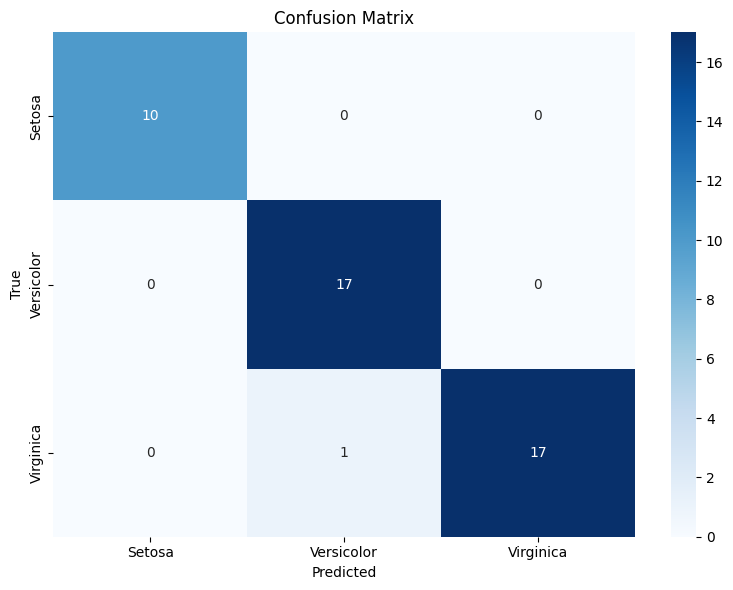

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(metrics['confusion_matrix'], class_names)

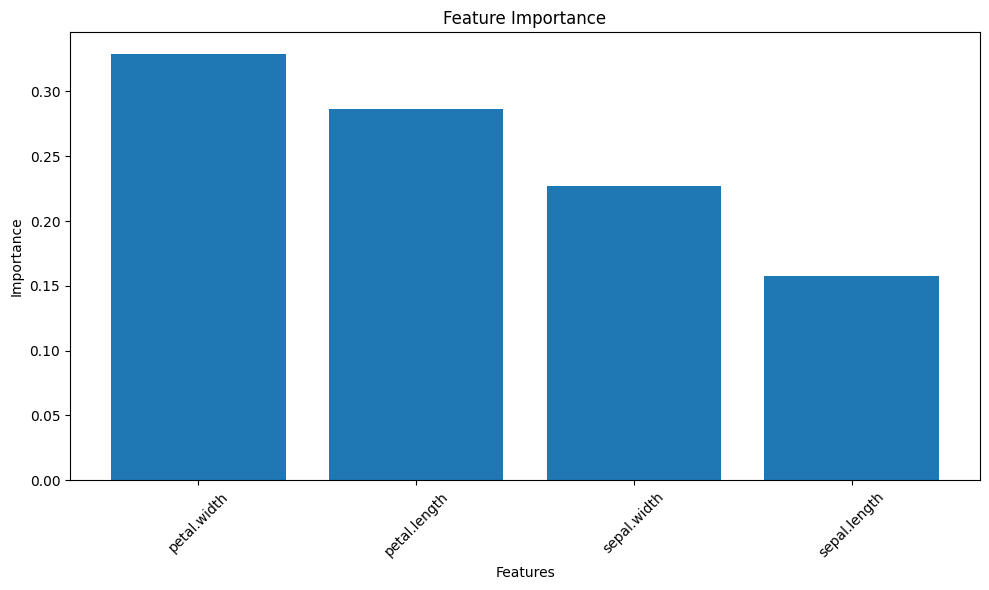

In [ ]:
# Plot feature importance
feature_importance = model.get_feature_importance()
plot_feature_importance(feature_importance, feature_names)

In [ ]:
model.get_weights()

array([[ 0.15 ,  0.315,  0.753, -0.945, -0.511],
       [ 0.58 ,  0.321,  0.161, -0.208, -0.815],
       [-0.73 , -0.636, -0.914,  1.153,  1.326]])

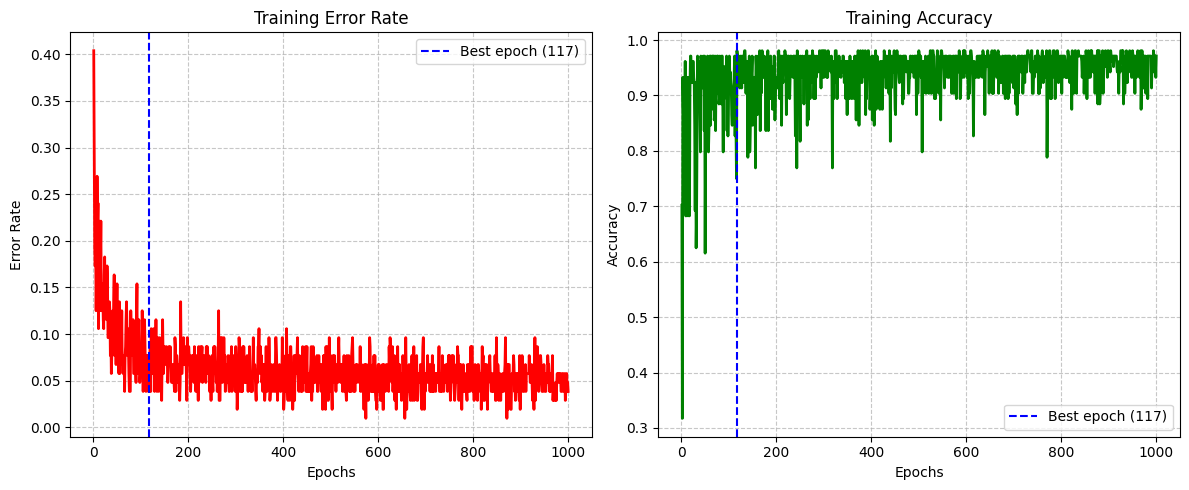

In [ ]:
# Plot training curve
model.plot_training_progress()

# Experiments

In [ ]:
class ModelRunner:
    def __init__(self, X_train, y_train, X_test, y_test, class_names, feature_names):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.class_names = class_names
        self.feature_names = feature_names
        self.model = None
        self.metrics = None

    def train(self, weight, lr, weight_set):
        self.model = MulticlassPerceptron(learning_rate=lr, max_epochs=1000)
        self.model.set_weights(weight, class_names)
        self.model.fit(self.X_train, self.y_train, initialize_weights=weight_set)

    def evaluate(self):
        if self.model is None:
            raise ValueError("Model has not been trained yet.")

        y_pred = self.model.predict(self.X_test)
        self.metrics = calculate_metrics(self.y_test, y_pred, self.model.classes, self.class_names)

        print("\nFinal Weights (Best):")
        for i, cls in enumerate(self.model.classes):
            print(f"{self.class_names[cls]}: {self.model.weights[i]}")

        print("\nClassification Report:")
        print(f"Accuracy: {self.metrics['accuracy']:.4f}")
        print("\nPer-class metrics:")
        for i, cls in enumerate(self.model.classes):
            print(f"{self.class_names[cls]}:")
            print(f"  Precision: {self.metrics['precision'][i]:.4f}")
            print(f"  Recall: {self.metrics['recall'][i]:.4f}")
            print(f"  F1-score: {self.metrics['f1'][i]:.4f}")
        print(f"\nMacro-average Precision: {self.metrics['macro_precision']:.4f}")
        print(f"Macro-average Recall: {self.metrics['macro_recall']:.4f}")
        print(f"Macro-average F1-score: {self.metrics['macro_f1']:.4f}")

    def plot_all(self, iris_x, iris_y):
        if self.model is None or self.metrics is None:
            raise ValueError("Train and evaluate the model before plotting.")

        plot_decision_boundary(iris_x, iris_y, self.model, feature_names=self.feature_names, class_names=self.class_names)
        plot_confusion_matrix(self.metrics['confusion_matrix'], self.class_names)
        feature_importance = self.model.get_feature_importance()
        plot_feature_importance(feature_importance, self.feature_names)
        self.model.plot_training_progress()


## Dataset Splitting Distribution

### 80% Train and 20% Test

In [ ]:
# Split into train and test sets (80% train, 20% test)
np.random.seed(43)
indices = np.random.permutation(len(iris_x))
train_size = int(0.8 * len(iris_x))
X_train, X_test = iris_x[indices[:train_size]], iris_x[indices[train_size:]]
y_train, y_test = iris_y[indices[:train_size]], iris_y[indices[train_size:]]

In [ ]:
runner = ModelRunner(X_train, y_train, X_test, y_test, class_names, feature_names)
runner.train(weight = None, lr = 0.01, weight_set = True)
runner.evaluate()

No weights provided.
Epoch 1: New best accuracy: 0.6891
Epoch 3: New best accuracy: 0.9076
Epoch 12: New best accuracy: 0.9580
Epoch 17: New best accuracy: 0.9748
Epoch 69: New best accuracy: 0.9832
Training completed. Best accuracy at epoch 69: 0.9832

Final Weights (Best):
Setosa: [ 0.14   0.328  0.69  -0.829 -0.442]
Versicolor: [ 0.42   0.246  0.212 -0.236 -0.623]
Virginica: [-0.56  -0.574 -0.902  1.065  1.065]

Classification Report:
Accuracy: 1.0000

Per-class metrics:
Setosa:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Versicolor:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Virginica:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000

Macro-average Precision: 1.0000
Macro-average Recall: 1.0000
Macro-average F1-score: 1.0000


Decision boundary plot only works for 2D features


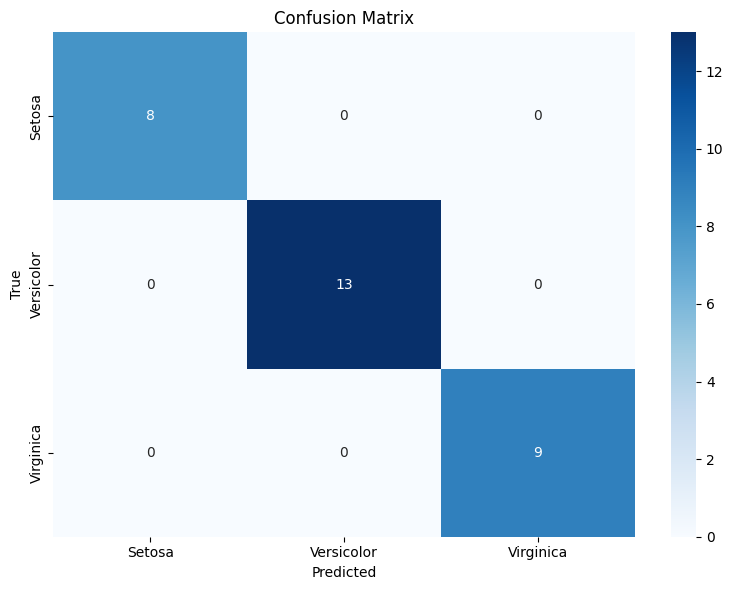

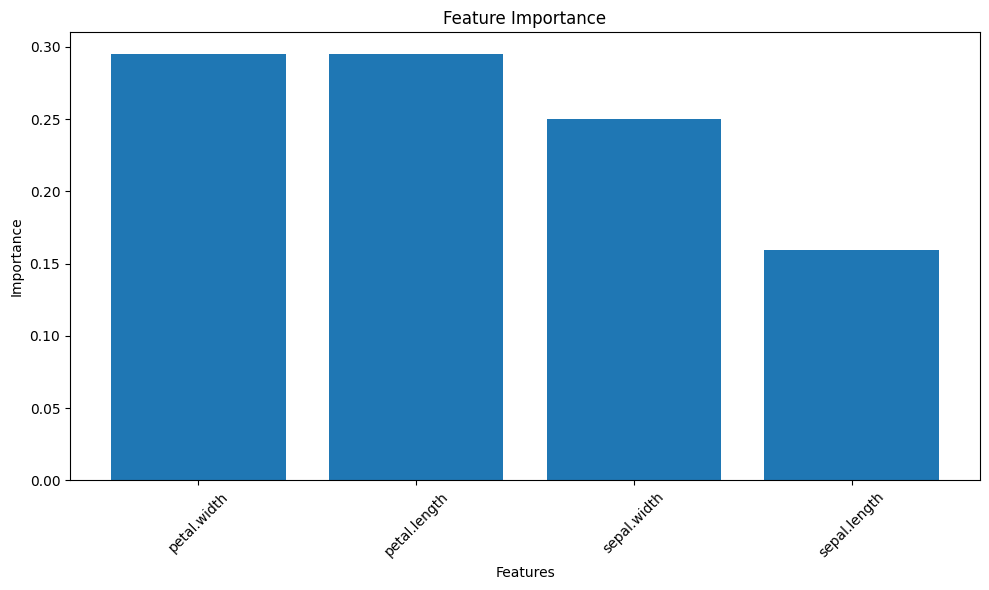

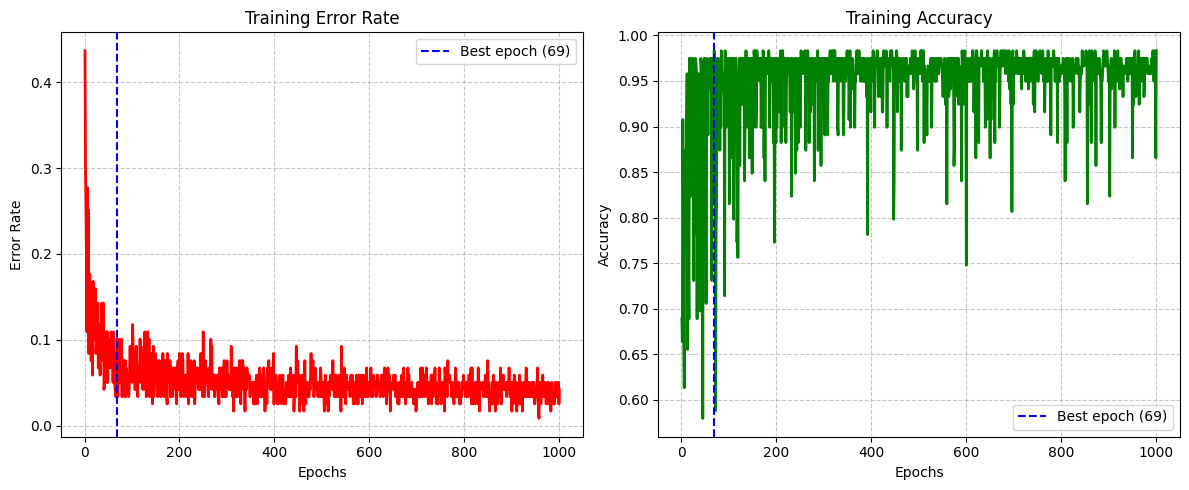

In [ ]:
runner.plot_all(iris_x, iris_y)

#### 2D Testing

In [ ]:
selected_indices = [2, 3]  # petal length and petal width
X_train_2d = X_train[:, selected_indices]
X_test_2d = X_test[:, selected_indices]
iris_x_2d = iris_x[:, selected_indices]
selected_feature_names = [feature_names[i] for i in selected_indices]

No weights provided.
Epoch 1: New best accuracy: 0.6134
Epoch 2: New best accuracy: 0.7731
Epoch 4: New best accuracy: 0.8739
Epoch 7: New best accuracy: 0.8992
Epoch 9: New best accuracy: 0.9328
Epoch 10: New best accuracy: 0.9412
Epoch 14: New best accuracy: 0.9496
Epoch 31: New best accuracy: 0.9580
Epoch 64: New best accuracy: 0.9664
Epoch 123: New best accuracy: 0.9748
Training completed. Best accuracy at epoch 123: 0.9748

Final Weights (Best):
Setosa: [ 0.93  -0.14  -0.339]
Versicolor: [ 0.64  -0.06  -0.137]
Virginica: [-1.57   0.2    0.476]

Classification Report:
Accuracy: 1.0000

Per-class metrics:
Setosa:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Versicolor:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Virginica:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000

Macro-average Precision: 1.0000
Macro-average Recall: 1.0000
Macro-average F1-score: 1.0000


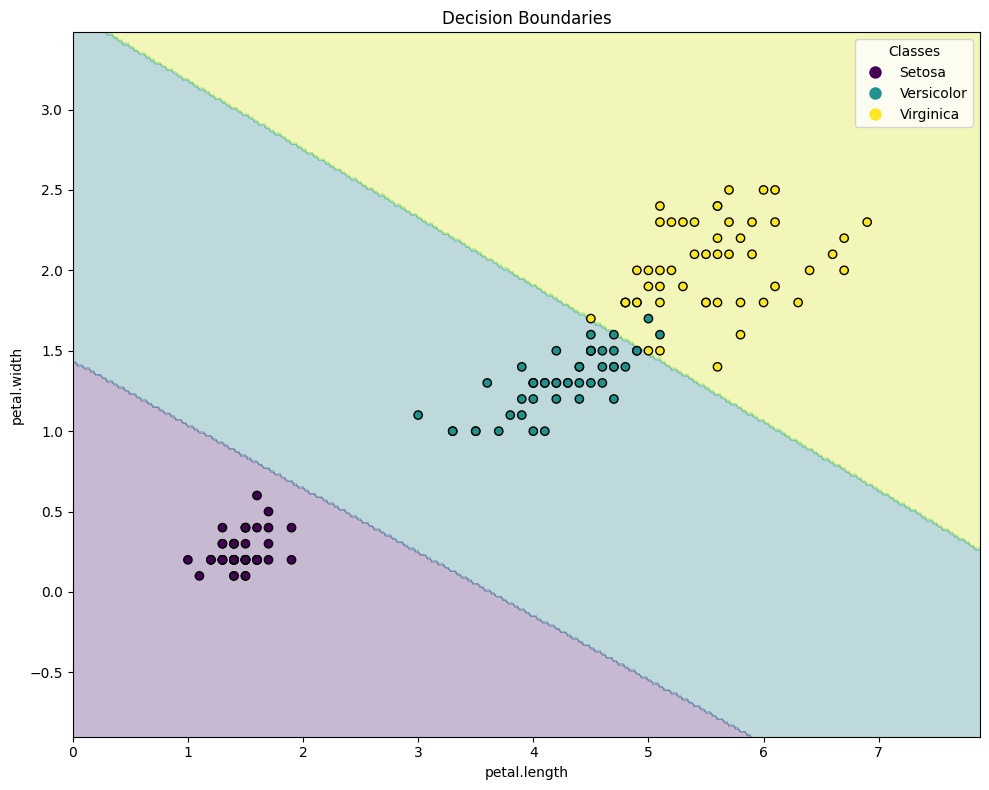

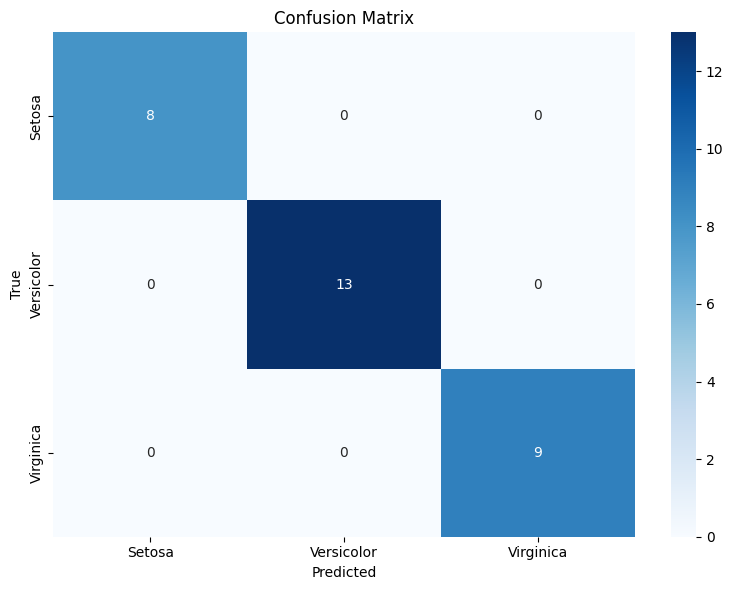

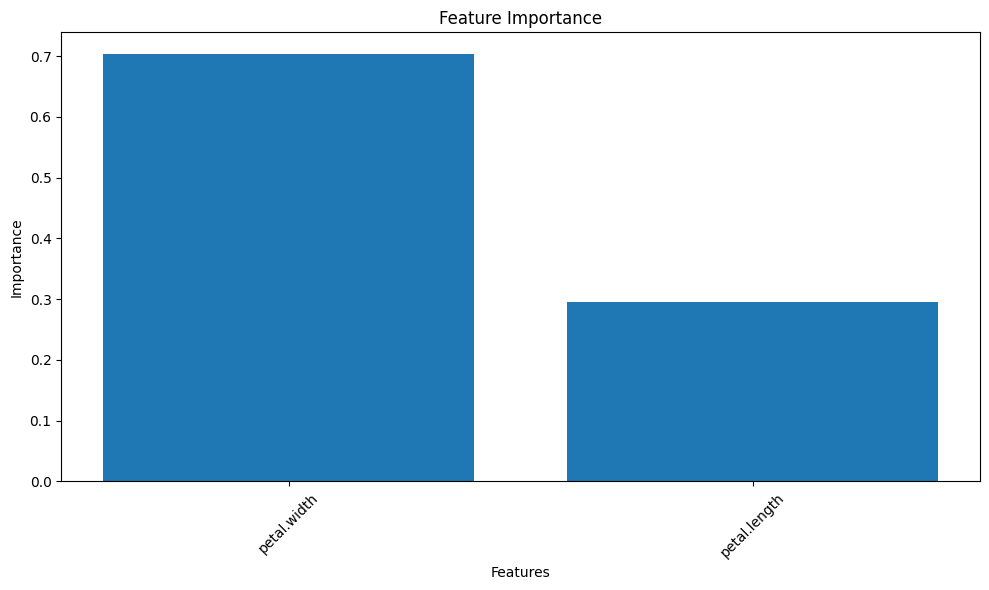

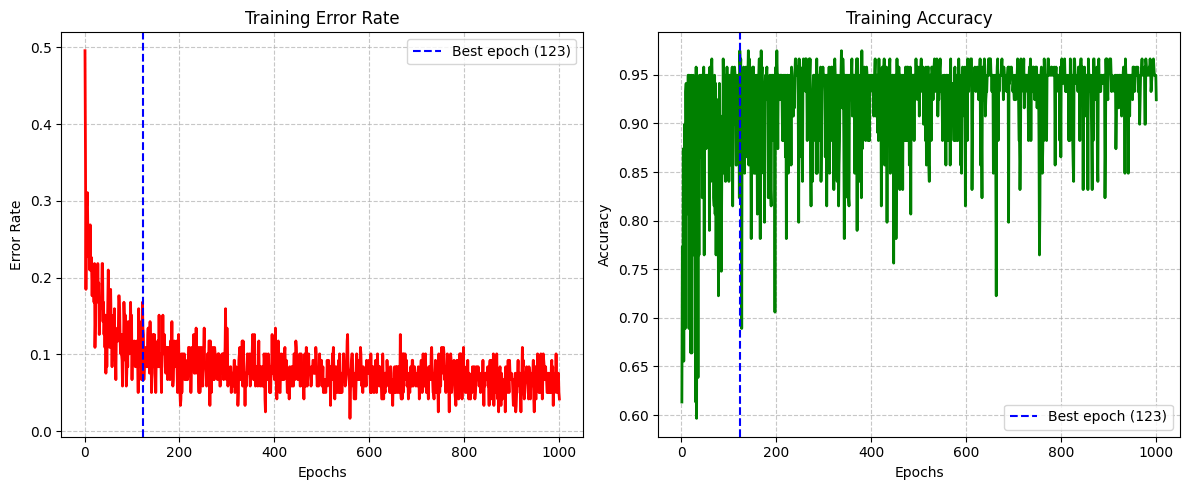

In [ ]:
runner = ModelRunner(X_train_2d, y_train, X_test_2d, y_test, class_names, selected_feature_names)
runner.train(weight = None, lr=0.01, weight_set=True)
runner.evaluate()
runner.plot_all(iris_x_2d, iris_y)

### 60% Train and 40% Test

In [ ]:
# Split into train and test sets (60% train, 40% test)
np.random.seed(44)
indices = np.random.permutation(len(iris_x))
train_size = int(0.6 * len(iris_x))
X_train, X_test = iris_x[indices[:train_size]], iris_x[indices[train_size:]]
y_train, y_test = iris_y[indices[:train_size]], iris_y[indices[train_size:]]

In [ ]:
runner = ModelRunner(X_train, y_train, X_test, y_test, class_names, feature_names)
runner.train(weight = None, lr = 0.01, weight_set = True)
runner.evaluate()

No weights provided.
Epoch 1: New best accuracy: 0.3708
Epoch 2: New best accuracy: 0.7079
Epoch 3: New best accuracy: 0.8202
Epoch 4: New best accuracy: 0.9326
Epoch 6: New best accuracy: 0.9775
Epoch 7: New best accuracy: 0.9888
Epoch 12: New best accuracy: 1.0000
Converged at epoch 13
Training completed. Best accuracy at epoch 12: 1.0000

Final Weights (Best):
Setosa: [ 0.06   0.134  0.277 -0.345 -0.183]
Versicolor: [ 0.09   0.175 -0.044 -0.122 -0.201]
Virginica: [-0.15  -0.309 -0.233  0.467  0.384]

Classification Report:
Accuracy: 0.9167

Per-class metrics:
Setosa:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Versicolor:
  Precision: 1.0000
  Recall: 0.7917
  F1-score: 0.8837
Virginica:
  Precision: 0.7917
  Recall: 1.0000
  F1-score: 0.8837

Macro-average Precision: 0.9306
Macro-average Recall: 0.9306
Macro-average F1-score: 0.9225


Decision boundary plot only works for 2D features


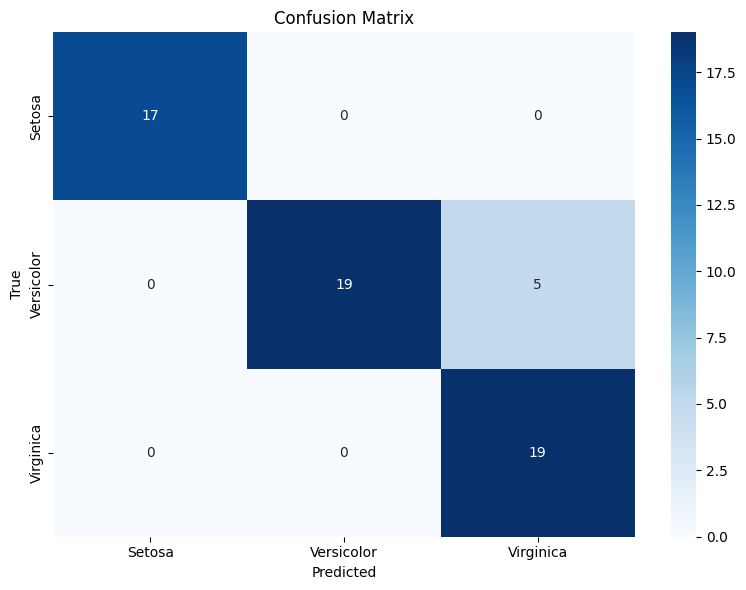

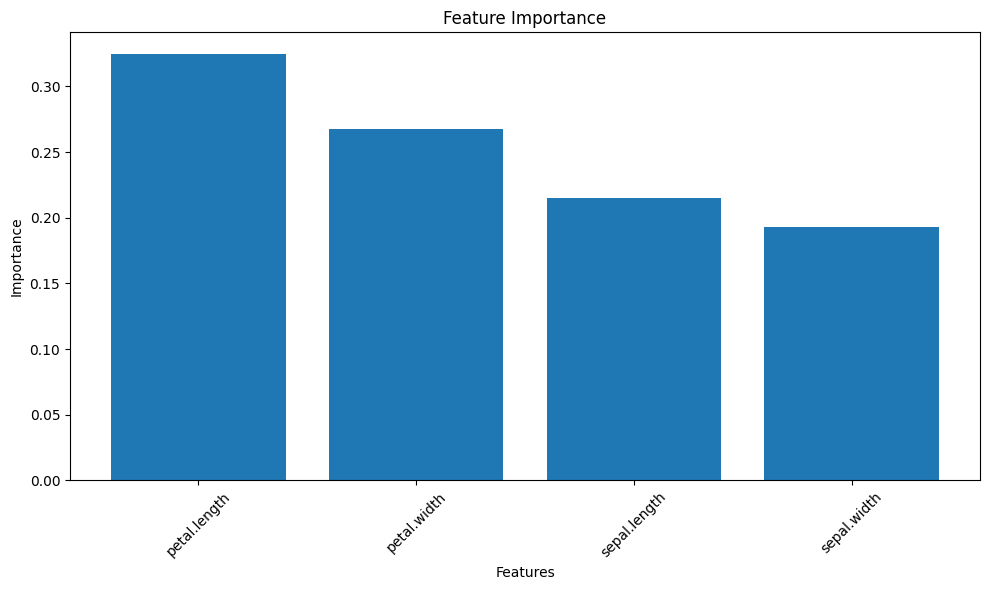

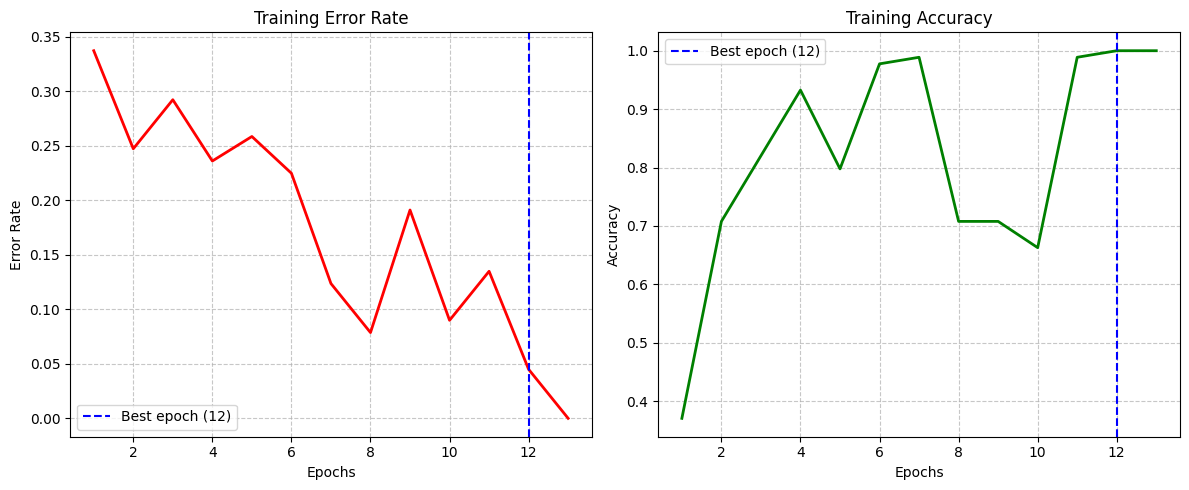

In [ ]:
runner.plot_all(iris_x, iris_y)

#### 2D Testing

In [ ]:
selected_indices = [2, 3]  # petal length and petal width
X_train_2d = X_train[:, selected_indices]
X_test_2d = X_test[:, selected_indices]
iris_x_2d = iris_x[:, selected_indices]
selected_feature_names = [feature_names[i] for i in selected_indices]

No weights provided.
Epoch 1: New best accuracy: 0.7079
Epoch 2: New best accuracy: 0.9438
Epoch 9: New best accuracy: 0.9663
Epoch 11: New best accuracy: 0.9775
Epoch 64: New best accuracy: 0.9888
Epoch 542: New best accuracy: 1.0000
Converged at epoch 543
Training completed. Best accuracy at epoch 542: 1.0000

Final Weights (Best):
Setosa: [ 1.22  -0.156 -0.471]
Versicolor: [ 0.86  -0.053 -0.314]
Virginica: [-2.08   0.209  0.785]

Classification Report:
Accuracy: 0.9333

Per-class metrics:
Setosa:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Versicolor:
  Precision: 1.0000
  Recall: 0.8333
  F1-score: 0.9091
Virginica:
  Precision: 0.8261
  Recall: 1.0000
  F1-score: 0.9048

Macro-average Precision: 0.9420
Macro-average Recall: 0.9444
Macro-average F1-score: 0.9380


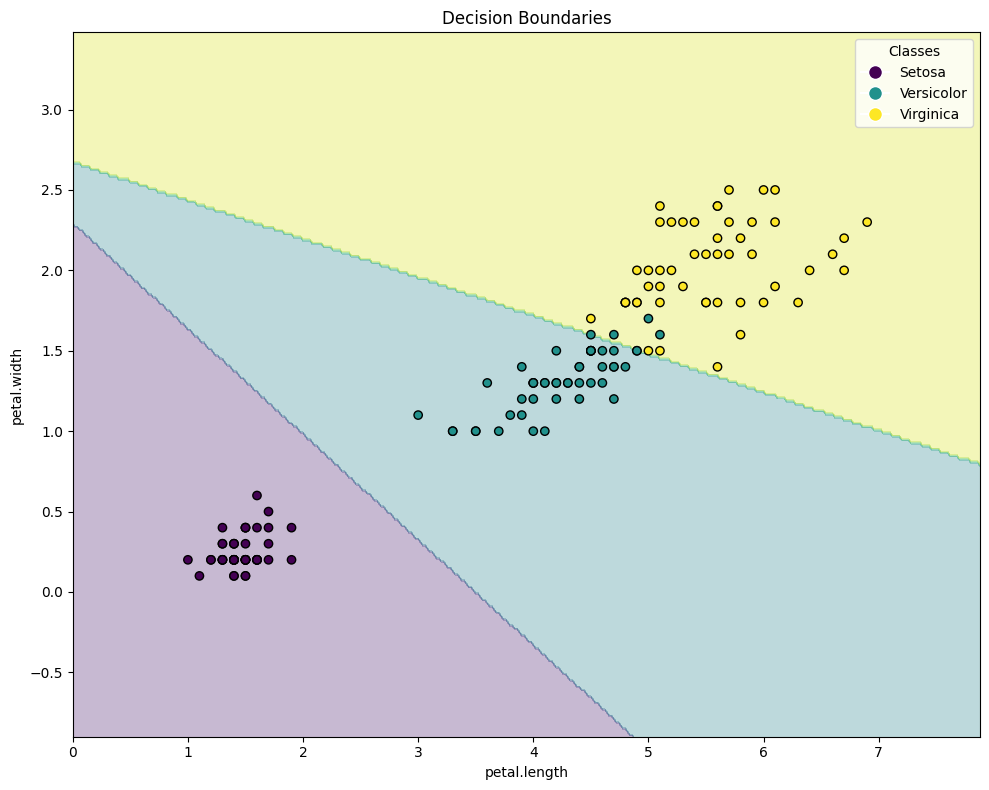

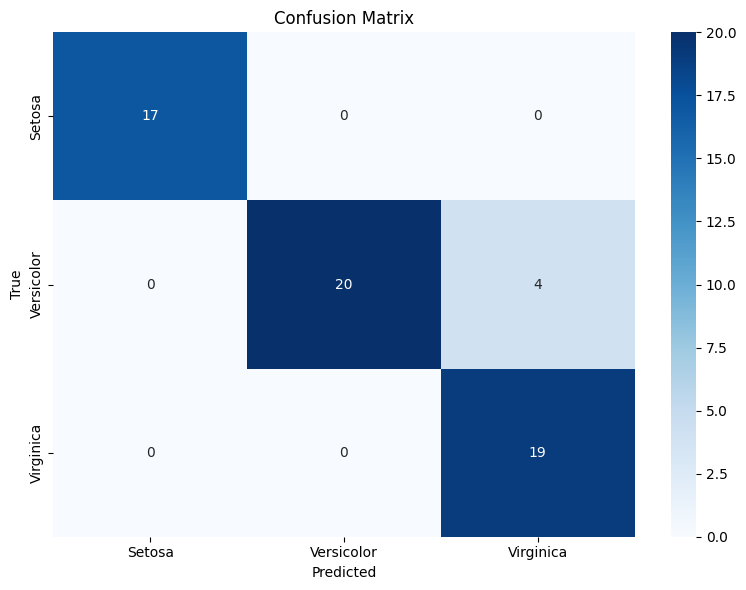

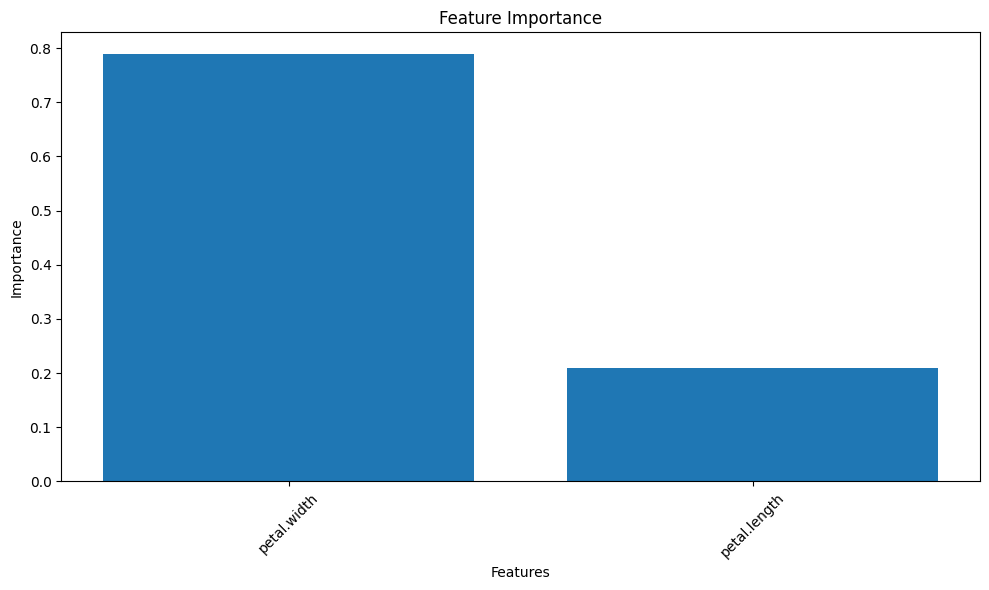

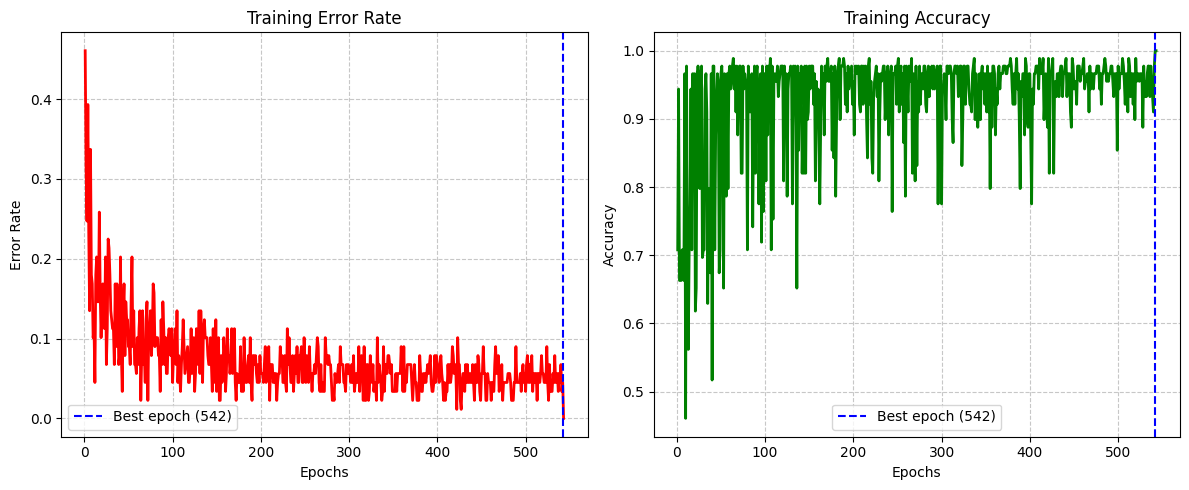

In [ ]:
runner = ModelRunner(X_train_2d, y_train, X_test_2d, y_test, class_names, selected_feature_names)
runner.train(weight = None, lr=0.01, weight_set=True)
runner.evaluate()
runner.plot_all(iris_x_2d, iris_y)

## Learning Rate Modification (70% train, 30% test)

### Learning Rate at 0.01

In [ ]:
# Learning Rate 0.01 and Weights are random
runner_zerozeroone = ModelRunner(X_train, y_train, X_test, y_test, class_names, feature_names)
runner_zerozeroone.train(weight = None, lr = 0.01, weight_set = True)
runner_zerozeroone.evaluate()

No weights provided.
Epoch 1: New best accuracy: 0.9663
Epoch 3: New best accuracy: 1.0000
Converged at epoch 4
Training completed. Best accuracy at epoch 3: 1.0000

Final Weights (Best):
Setosa: [ 0.03   0.063  0.152 -0.214 -0.105]
Versicolor: [ 0.02   0.043 -0.033  0.008 -0.032]
Virginica: [-0.05  -0.106 -0.119  0.206  0.137]

Classification Report:
Accuracy: 0.9500

Per-class metrics:
Setosa:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Versicolor:
  Precision: 1.0000
  Recall: 0.8750
  F1-score: 0.9333
Virginica:
  Precision: 0.8636
  Recall: 1.0000
  F1-score: 0.9268

Macro-average Precision: 0.9545
Macro-average Recall: 0.9583
Macro-average F1-score: 0.9534


Decision boundary plot only works for 2D features


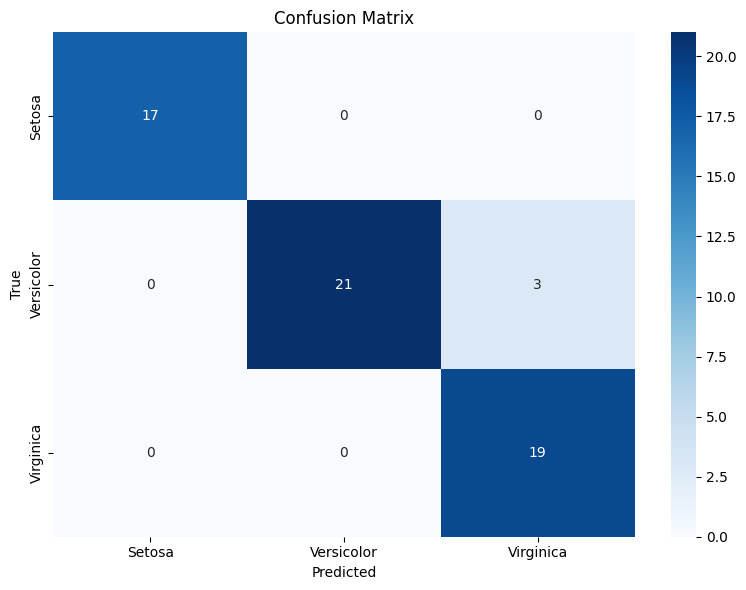

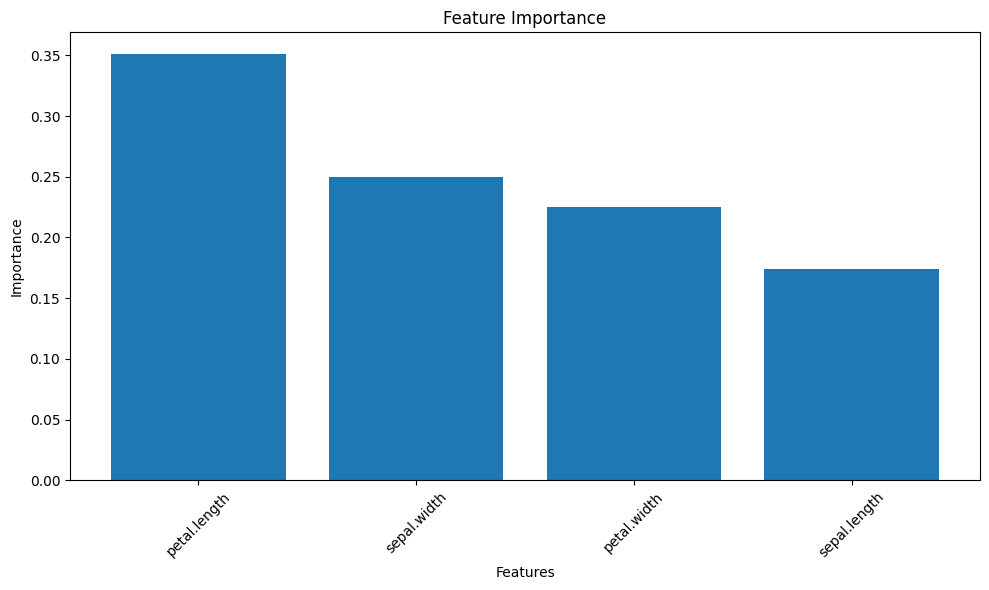

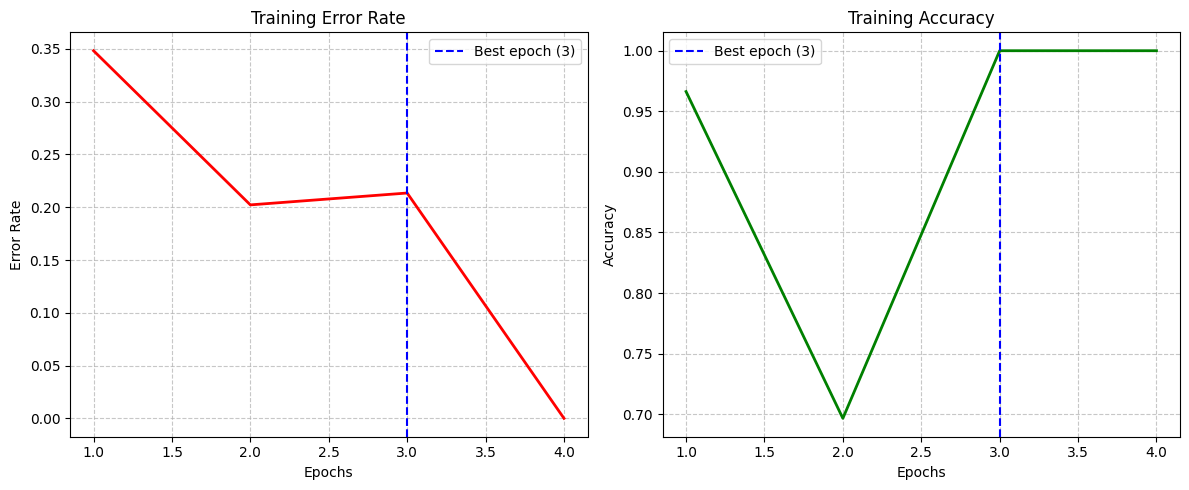

In [ ]:
runner_zerozeroone.plot_all(iris_x, iris_y)

### Learning Rate at 0.1

In [ ]:
# Learning Rate 0.1 and Weights are random
runner_zeroone = ModelRunner(X_train, y_train, X_test, y_test, class_names, feature_names)
runner_zeroone.train(weight = None, lr = 0.01, weight_set = True)
runner_zeroone.evaluate()

No weights provided.
Epoch 1: New best accuracy: 0.3820
Epoch 2: New best accuracy: 1.0000
Converged at epoch 3
Training completed. Best accuracy at epoch 2: 1.0000

Final Weights (Best):
Setosa: [ 0.02   0.045  0.1   -0.149 -0.059]
Versicolor: [ 0.02   0.037 -0.035  0.009 -0.046]
Virginica: [-0.04  -0.082 -0.065  0.14   0.105]

Classification Report:
Accuracy: 0.9333

Per-class metrics:
Setosa:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Versicolor:
  Precision: 0.9545
  Recall: 0.8750
  F1-score: 0.9130
Virginica:
  Precision: 0.8571
  Recall: 0.9474
  F1-score: 0.9000

Macro-average Precision: 0.9372
Macro-average Recall: 0.9408
Macro-average F1-score: 0.9377


Decision boundary plot only works for 2D features


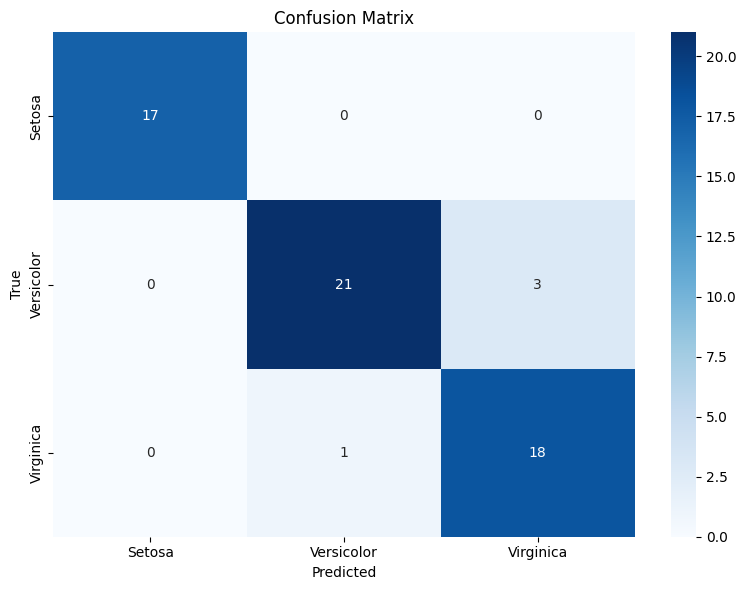

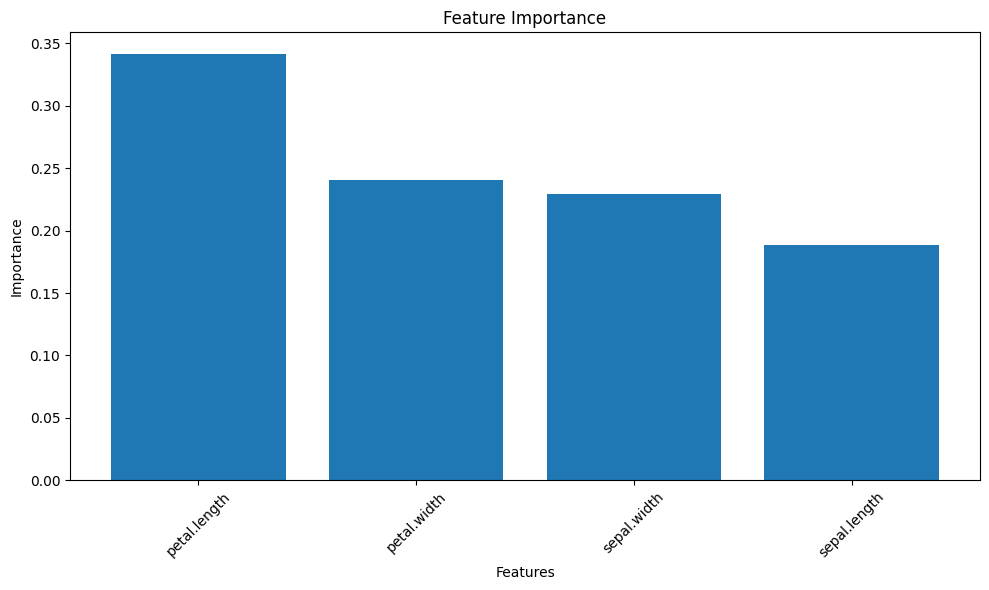

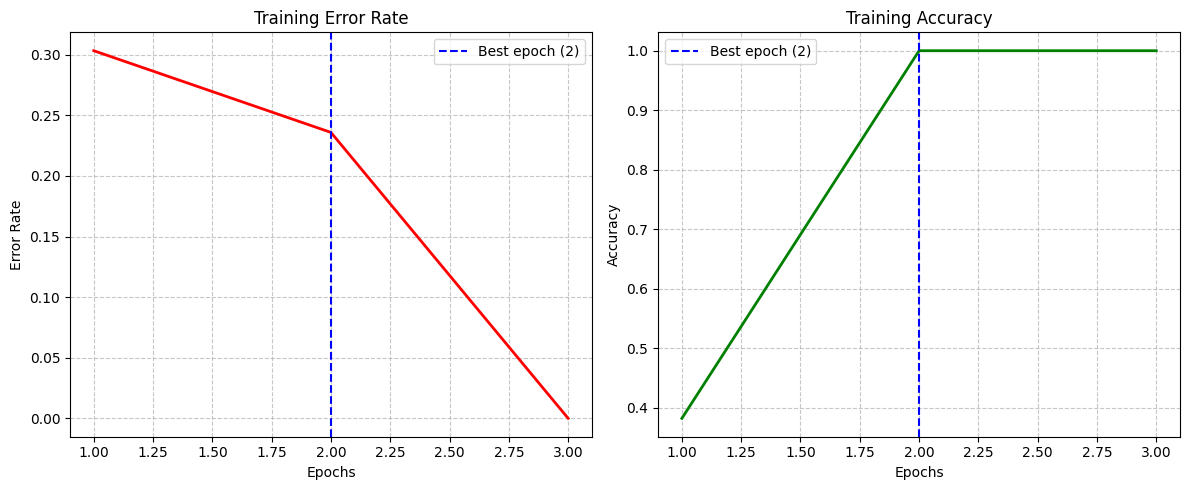

In [ ]:
runner_zeroone.plot_all(iris_x, iris_y)

## 2D Testing (Based on Feature Importance)

In [ ]:
selected_indices = [2, 3]  # petal length and petal width
X_train_2d = X_train[:, selected_indices]
X_test_2d = X_test[:, selected_indices]
iris_x_2d = iris_x[:, selected_indices]
selected_feature_names = [feature_names[i] for i in selected_indices]

In [ ]:
selected_feature_names

['petal.length', 'petal.width']

No weights provided.
Epoch 1: New best accuracy: 0.2921
Epoch 2: New best accuracy: 0.6629
Epoch 3: New best accuracy: 0.7079
Epoch 4: New best accuracy: 0.8876
Epoch 8: New best accuracy: 0.9663
Epoch 29: New best accuracy: 0.9775
Epoch 57: New best accuracy: 0.9888
Epoch 346: New best accuracy: 1.0000
Converged at epoch 347
Training completed. Best accuracy at epoch 346: 1.0000

Final Weights (Best):
Setosa: [ 1.05  -0.14  -0.412]
Versicolor: [ 0.72  -0.031 -0.288]
Virginica: [-1.77   0.171  0.7  ]

Classification Report:
Accuracy: 0.9333

Per-class metrics:
Setosa:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Versicolor:
  Precision: 1.0000
  Recall: 0.8333
  F1-score: 0.9091
Virginica:
  Precision: 0.8261
  Recall: 1.0000
  F1-score: 0.9048

Macro-average Precision: 0.9420
Macro-average Recall: 0.9444
Macro-average F1-score: 0.9380


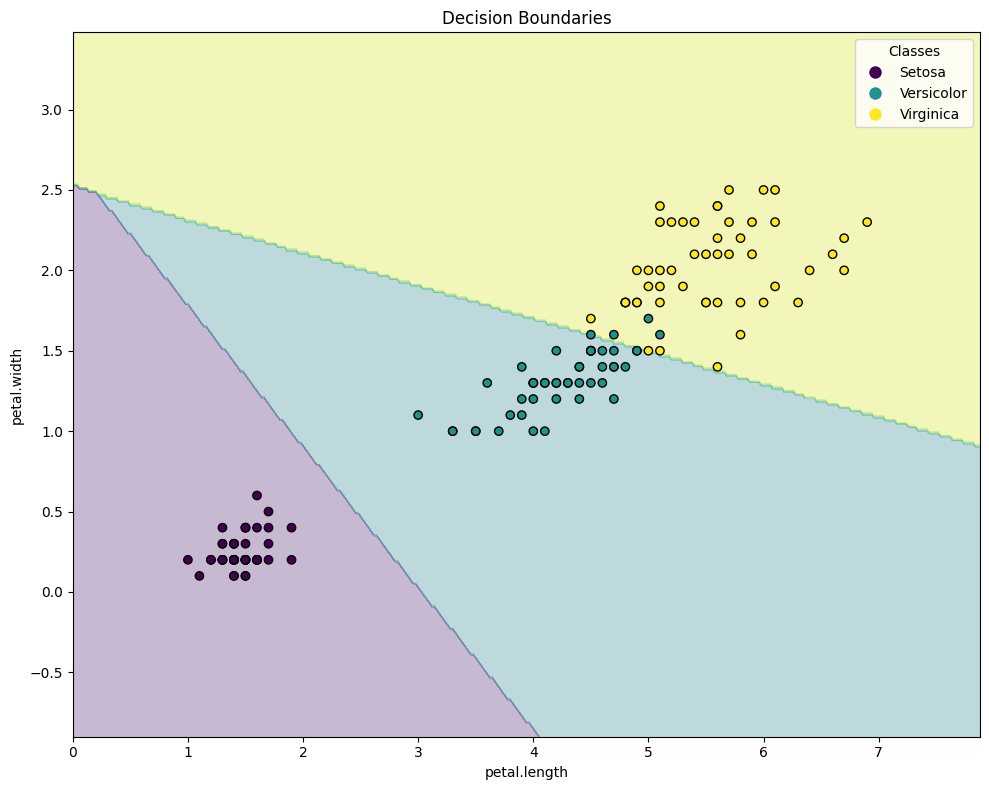

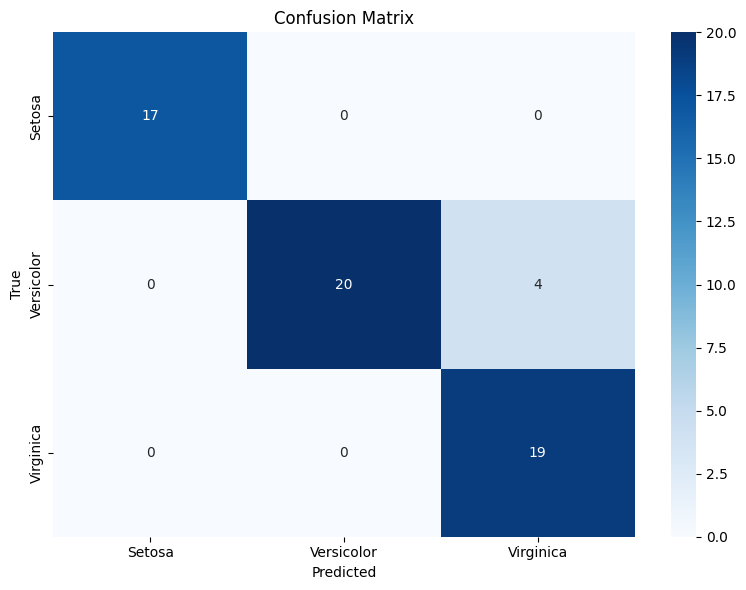

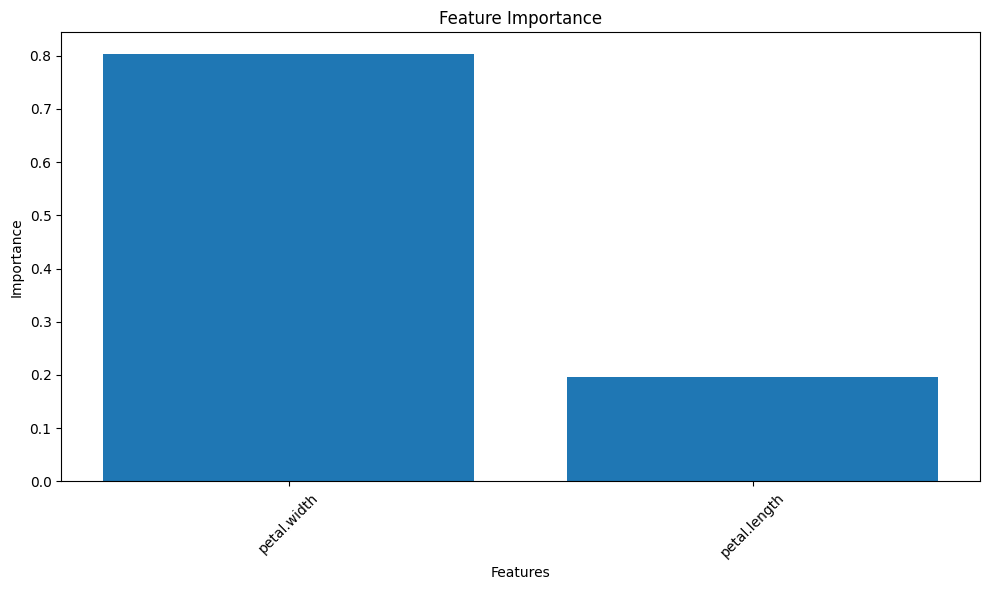

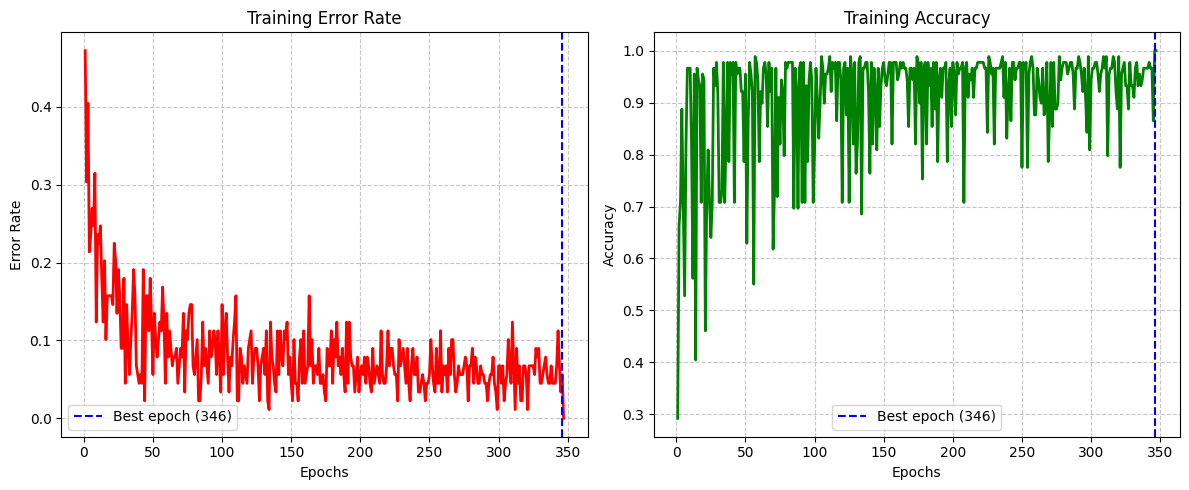

In [ ]:
# With LR = 0.01
runner = ModelRunner(X_train_2d, y_train, X_test_2d, y_test, class_names, selected_feature_names)
runner.train(weight = None, lr=0.01, weight_set=True)
runner.evaluate()
runner.plot_all(iris_x_2d, iris_y)

No weights provided.
Epoch 1: New best accuracy: 0.5843
Epoch 2: New best accuracy: 0.7079
Epoch 5: New best accuracy: 0.9101
Epoch 9: New best accuracy: 0.9663
Epoch 19: New best accuracy: 0.9775
Epoch 98: New best accuracy: 0.9888
Epoch 516: New best accuracy: 1.0000
Converged at epoch 517
Training completed. Best accuracy at epoch 516: 1.0000

Final Weights (Best):
Setosa: [12.   -1.68 -4.82]
Versicolor: [ 8.5  -0.38 -3.19]
Virginica: [-20.5    2.06   8.01]

Classification Report:
Accuracy: 0.9333

Per-class metrics:
Setosa:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Versicolor:
  Precision: 1.0000
  Recall: 0.8333
  F1-score: 0.9091
Virginica:
  Precision: 0.8261
  Recall: 1.0000
  F1-score: 0.9048

Macro-average Precision: 0.9420
Macro-average Recall: 0.9444
Macro-average F1-score: 0.9380


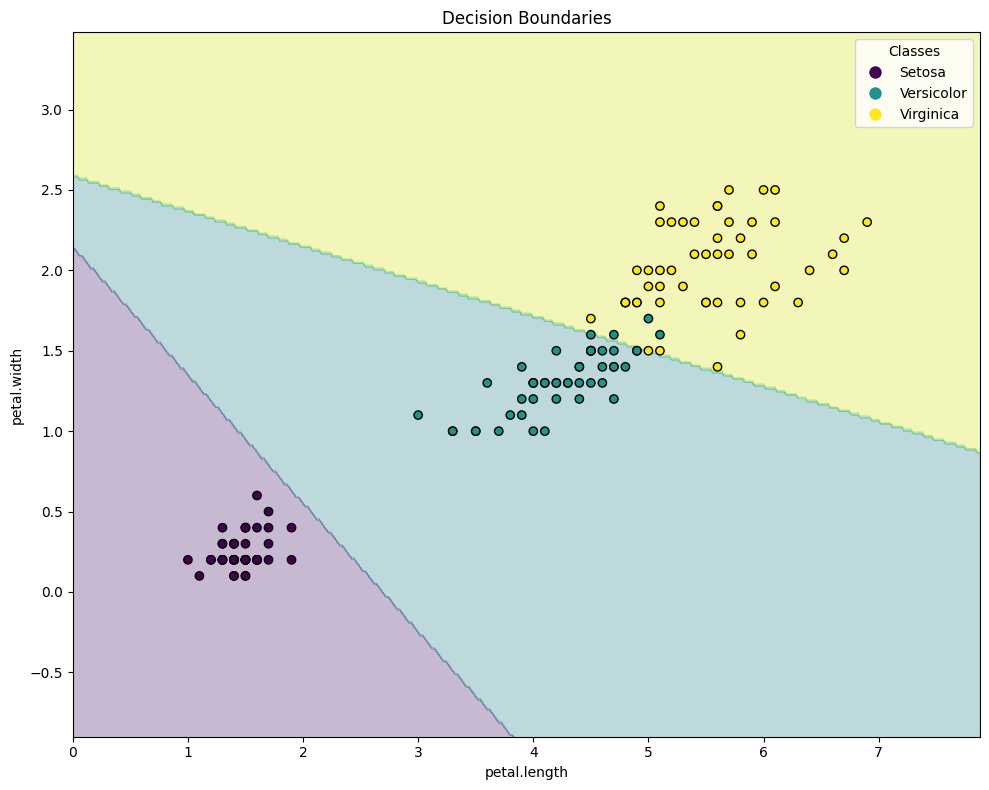

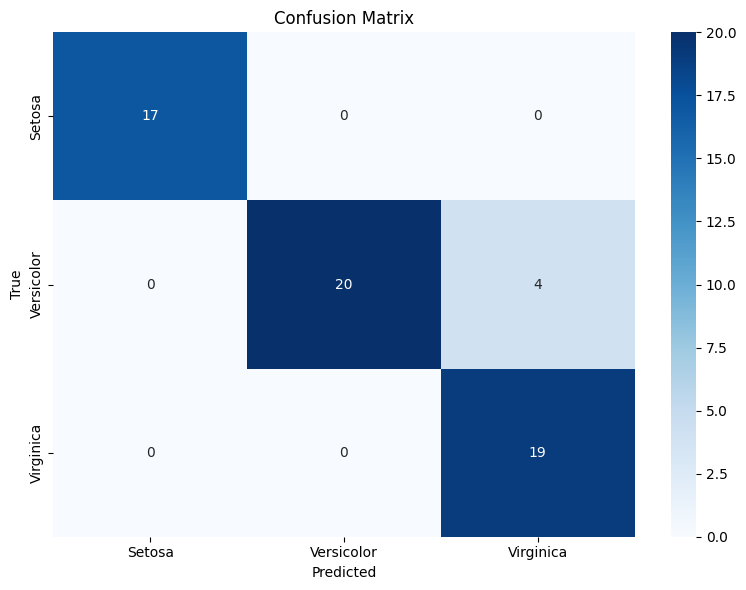

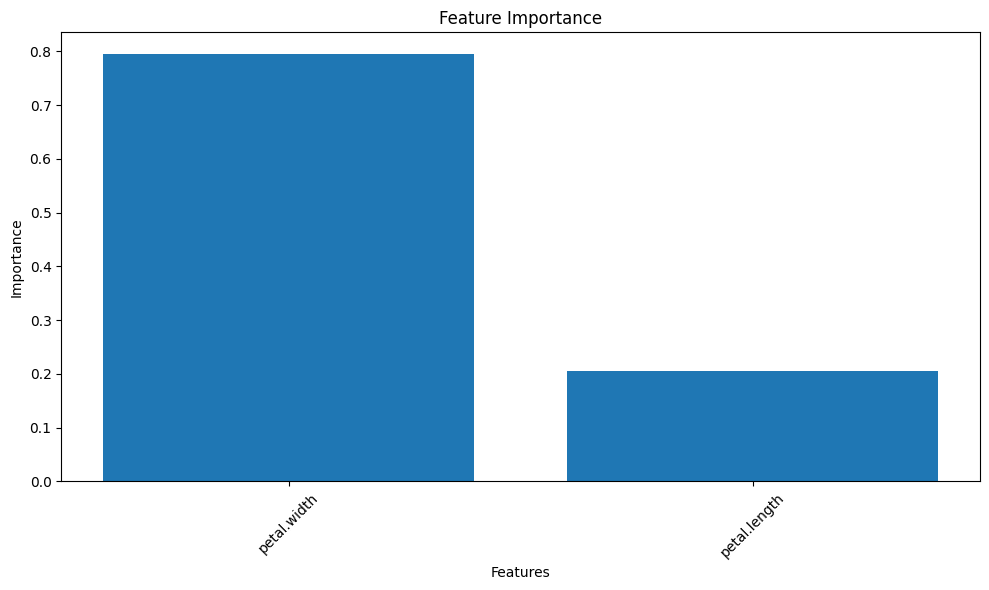

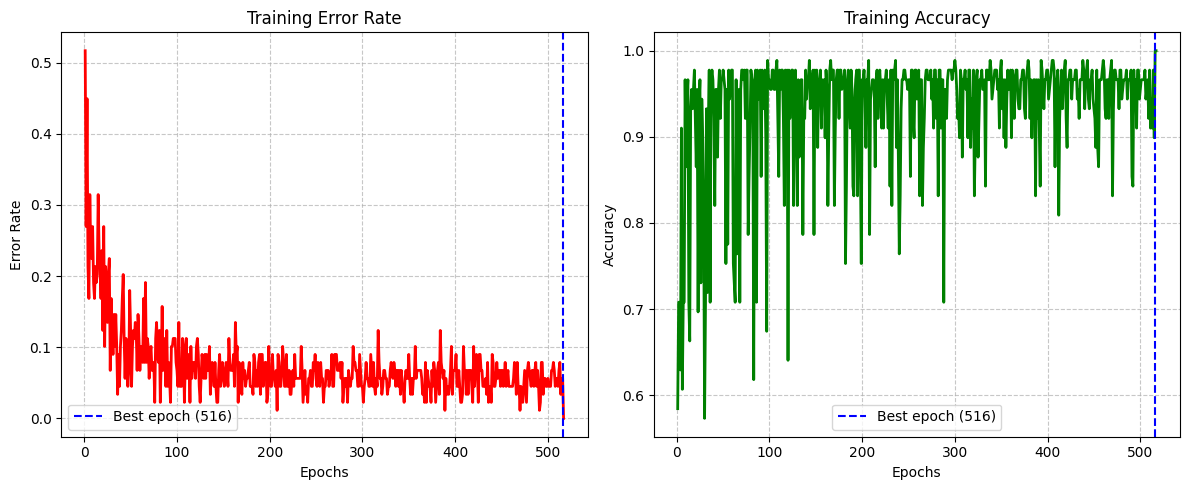

In [ ]:
# With LR = 0.1
runner = ModelRunner(X_train_2d, y_train, X_test_2d, y_test, class_names, selected_feature_names)
runner.train(weight = None, lr=0.1, weight_set=True)
runner.evaluate()
runner.plot_all(iris_x_2d, iris_y)

## Weights Modification (70% train, 30% test)

### Weights initialized at zero

In [ ]:
# All weights to zero
weight_zero = np.zeros((3, 5))
weight_zero

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
# All weights zero with Learning Rate 0.01
runner_zero = ModelRunner(X_train, y_train, X_test, y_test, class_names, feature_names)
runner_zero.train(weight = weight_zero, lr = 0.01, weight_set = False)
runner_zero.evaluate()

Custom weights set successfully. Shape: (3, 5)
Epoch 1: New best accuracy: 0.9775
Epoch 5: New best accuracy: 1.0000
Converged at epoch 6
Training completed. Best accuracy at epoch 5: 1.0000

Final Weights (Best):
Setosa: [ 0.04   0.081  0.206 -0.272 -0.117]
Versicolor: [ 0.04   0.095 -0.037 -0.032 -0.103]
Virginica: [-0.08  -0.176 -0.169  0.304  0.22 ]

Classification Report:
Accuracy: 0.9333

Per-class metrics:
Setosa:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Versicolor:
  Precision: 0.9545
  Recall: 0.8750
  F1-score: 0.9130
Virginica:
  Precision: 0.8571
  Recall: 0.9474
  F1-score: 0.9000

Macro-average Precision: 0.9372
Macro-average Recall: 0.9408
Macro-average F1-score: 0.9377


Decision boundary plot only works for 2D features


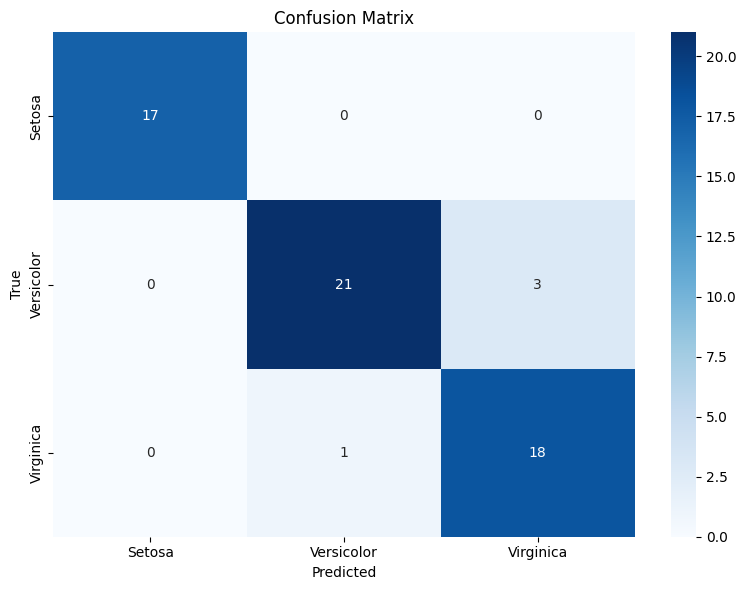

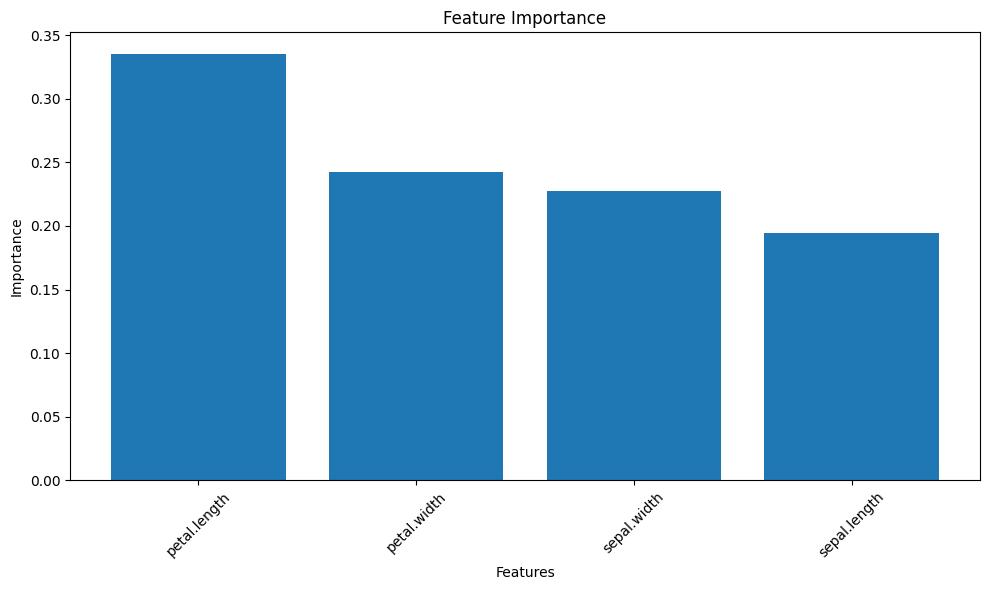

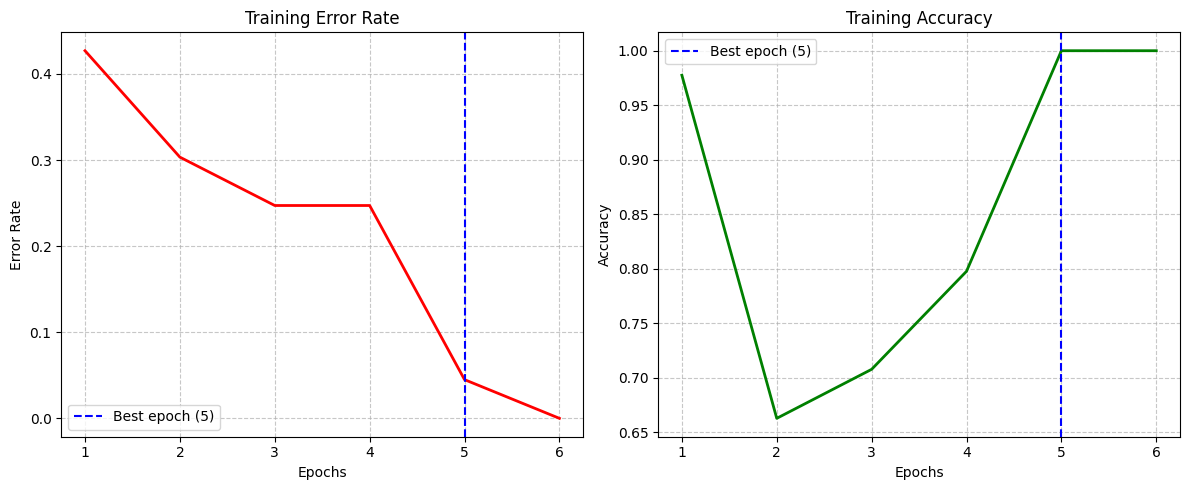

In [ ]:
runner_zero.plot_all(iris_x, iris_y)

### Weights between -0.5 and 0.5

In [ ]:
# Weights between -0.5 and 0.5
np.random.seed(40)
weight_fives = np.random.uniform(-0.5, 0.5, size=(3, 5))
weight_fives

array([[-0.09231297, -0.44463396,  0.28853488, -0.21269482, -0.04964941],
       [-0.19608769,  0.02639952,  0.12381221,  0.27677546,  0.18624165],
       [ 0.48093886,  0.10081609,  0.31396852,  0.20864515, -0.47246532]])

In [ ]:
# All weights -0.5 and 0.5 with Learning Rate 0.01
runner_zero = ModelRunner(X_train, y_train, X_test, y_test, class_names, feature_names)
runner_zero.train(weight = weight_fives, lr = 0.01, weight_set = False)
runner_zero.evaluate()

Custom weights set successfully. Shape: (3, 5)
Epoch 1: New best accuracy: 0.7079
Epoch 4: New best accuracy: 0.9438
Epoch 15: New best accuracy: 0.9775
Epoch 17: New best accuracy: 0.9888
Epoch 26: New best accuracy: 1.0000
Converged at epoch 27
Training completed. Best accuracy at epoch 26: 1.0000

Final Weights (Best):
Setosa: [ 0.05768703  0.05936604  0.78453488 -0.52469482 -0.22564941]
Versicolor: [ 0.02391231  0.24239952  0.15881221 -0.13922454 -0.42675835]
Virginica: [ 0.11093886 -0.61918391 -0.21703148  0.93664515  0.31653468]

Classification Report:
Accuracy: 0.9167

Per-class metrics:
Setosa:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Versicolor:
  Precision: 1.0000
  Recall: 0.7917
  F1-score: 0.8837
Virginica:
  Precision: 0.7917
  Recall: 1.0000
  F1-score: 0.8837

Macro-average Precision: 0.9306
Macro-average Recall: 0.9306
Macro-average F1-score: 0.9225


Decision boundary plot only works for 2D features


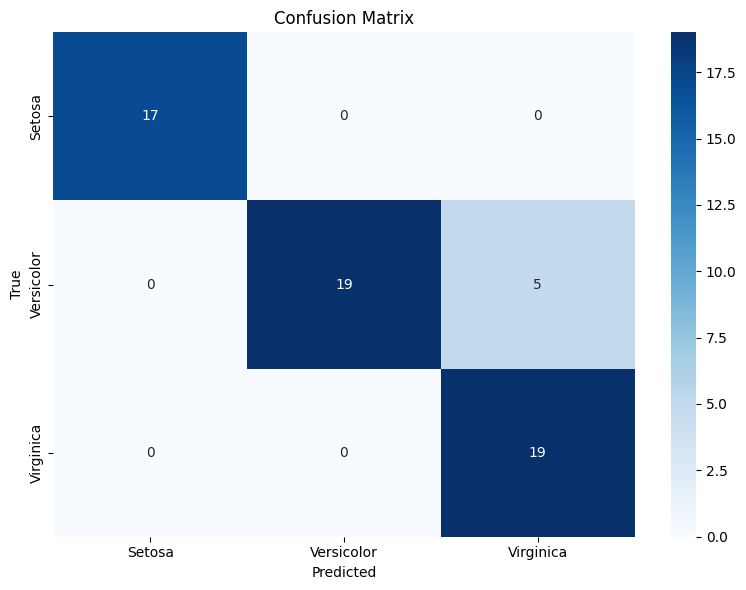

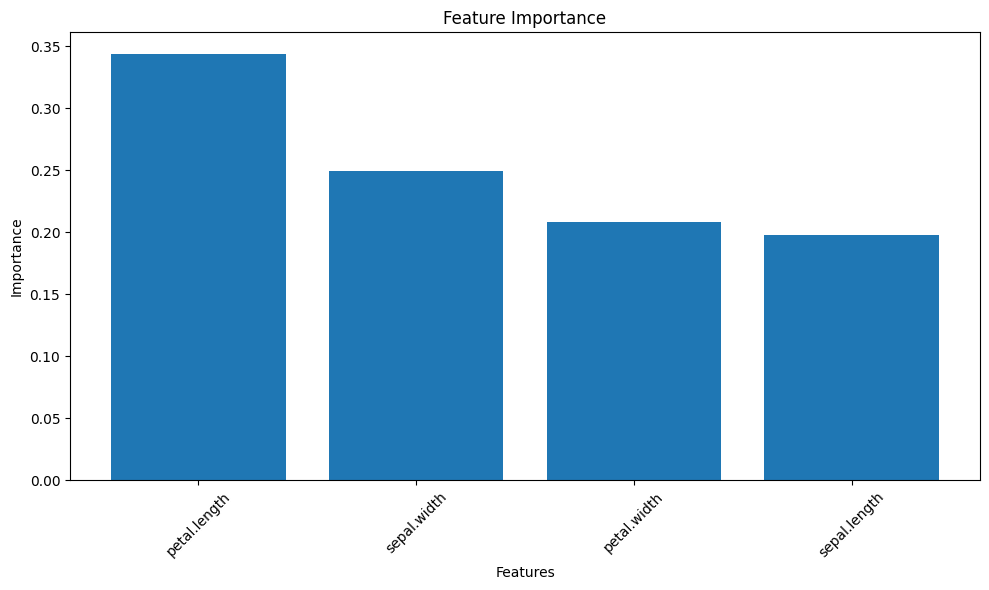

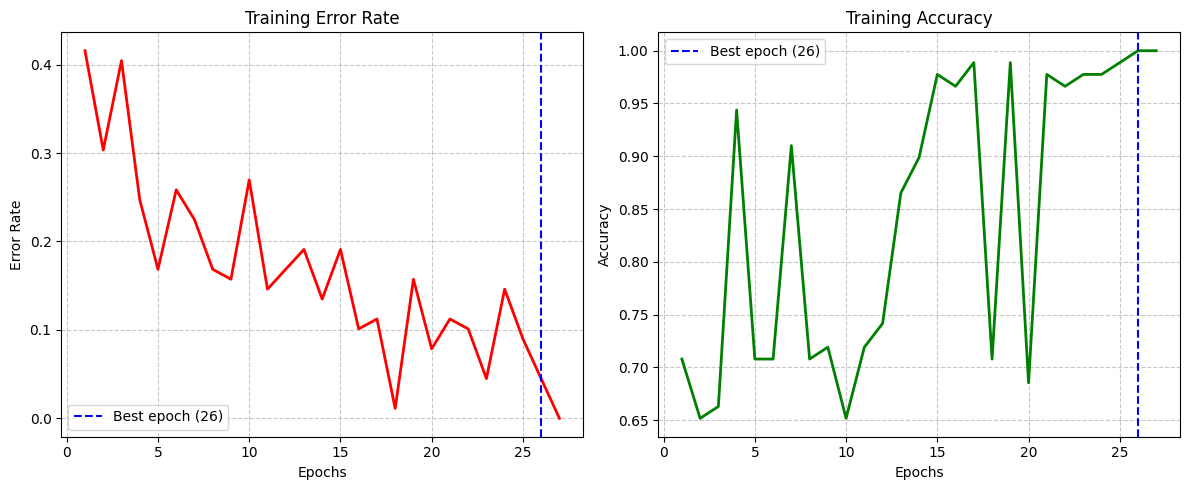

In [ ]:
runner_zero.plot_all(iris_x, iris_y)

## 2D Testing (Based on Feature Importance)

Custom weights set successfully. Shape: (3, 5)
Epoch 1: New best accuracy: 0.6629
Epoch 3: New best accuracy: 0.9438
Epoch 9: New best accuracy: 0.9775
Epoch 81: New best accuracy: 0.9888
Epoch 447: New best accuracy: 1.0000
Converged at epoch 448
Training completed. Best accuracy at epoch 447: 1.0000

Final Weights (Best):
Setosa: [ 1.14  -0.153 -0.44 ]
Versicolor: [ 0.79  -0.036 -0.312]
Virginica: [-1.93   0.189  0.752]

Classification Report:
Accuracy: 0.9333

Per-class metrics:
Setosa:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Versicolor:
  Precision: 1.0000
  Recall: 0.8333
  F1-score: 0.9091
Virginica:
  Precision: 0.8261
  Recall: 1.0000
  F1-score: 0.9048

Macro-average Precision: 0.9420
Macro-average Recall: 0.9444
Macro-average F1-score: 0.9380


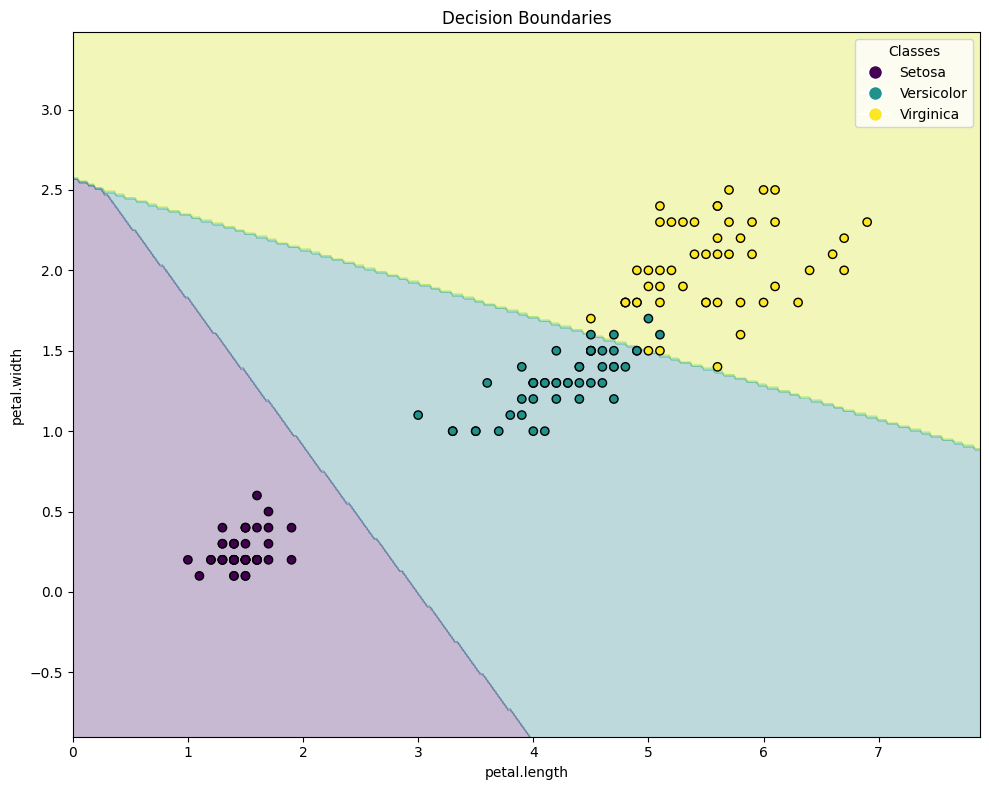

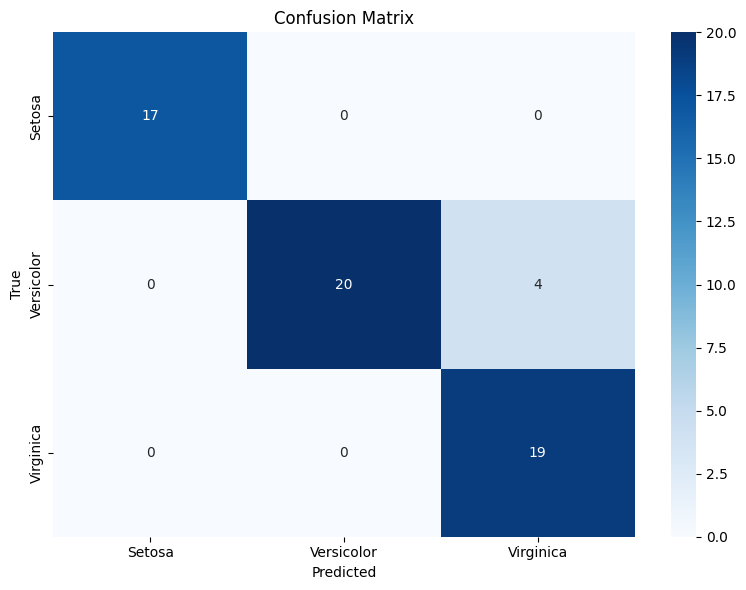

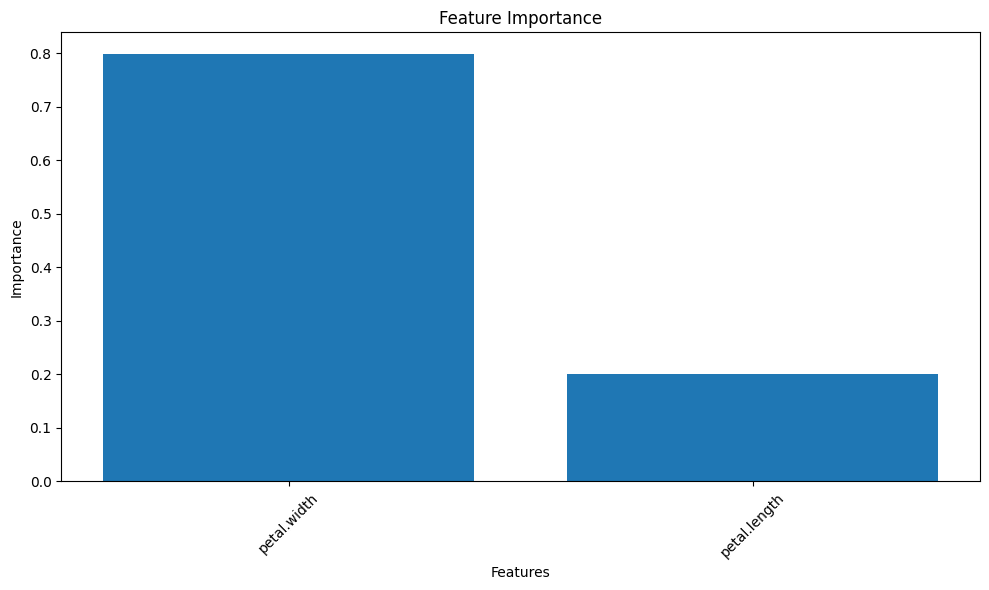

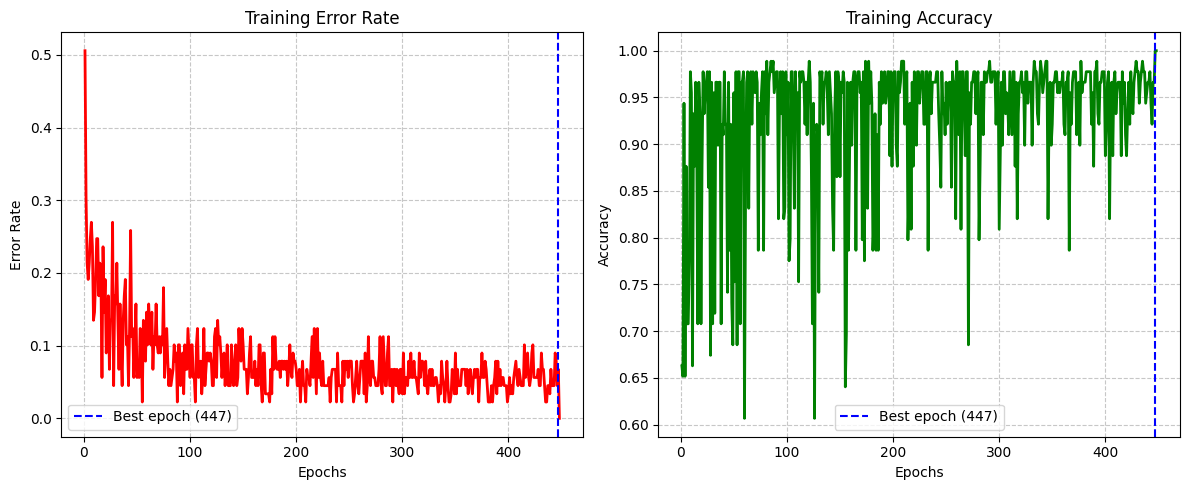

In [ ]:
# With Weight Zeros
runner = ModelRunner(X_train_2d, y_train, X_test_2d, y_test, class_names, selected_feature_names)
runner.train(weight = weight_zero, lr=0.01, weight_set=True)
runner.evaluate()
runner.plot_all(iris_x_2d, iris_y)

Custom weights set successfully. Shape: (3, 5)
Epoch 1: New best accuracy: 0.7079
Epoch 2: New best accuracy: 0.9775
Epoch 49: New best accuracy: 0.9888
Epoch 410: New best accuracy: 1.0000
Converged at epoch 411
Training completed. Best accuracy at epoch 410: 1.0000

Final Weights (Best):
Setosa: [ 1.12  -0.151 -0.431]
Versicolor: [ 0.78  -0.037 -0.304]
Virginica: [-1.9    0.188  0.735]

Classification Report:
Accuracy: 0.9333

Per-class metrics:
Setosa:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Versicolor:
  Precision: 1.0000
  Recall: 0.8333
  F1-score: 0.9091
Virginica:
  Precision: 0.8261
  Recall: 1.0000
  F1-score: 0.9048

Macro-average Precision: 0.9420
Macro-average Recall: 0.9444
Macro-average F1-score: 0.9380


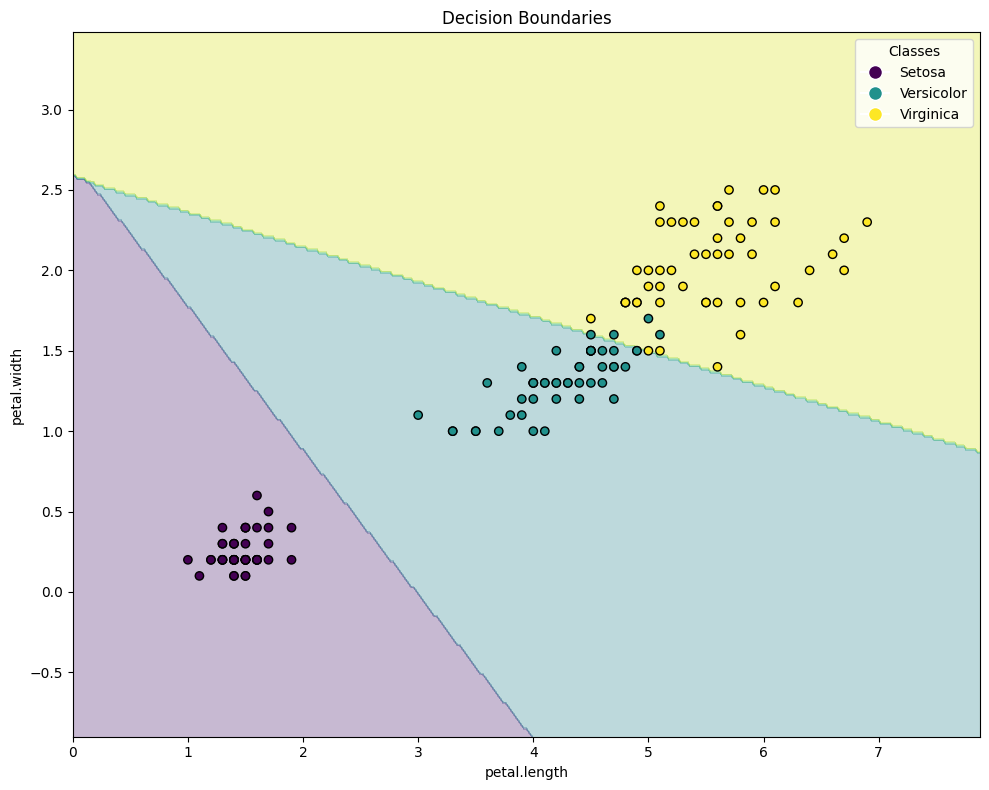

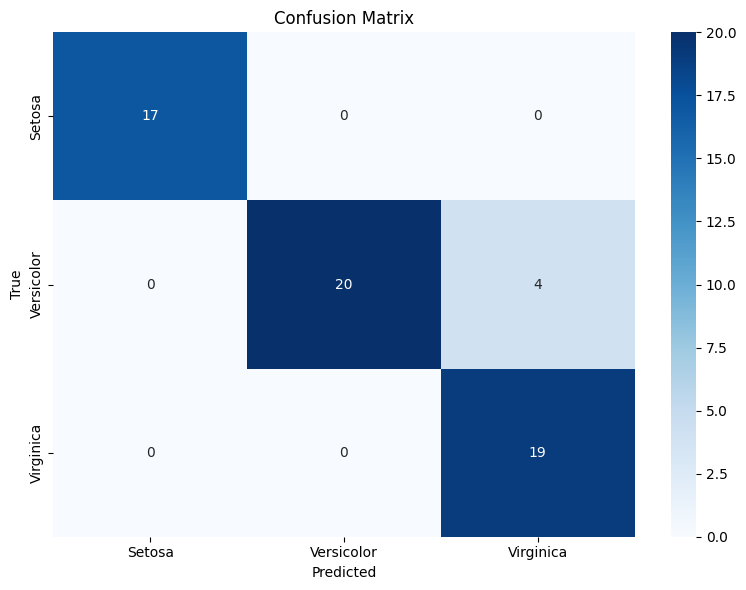

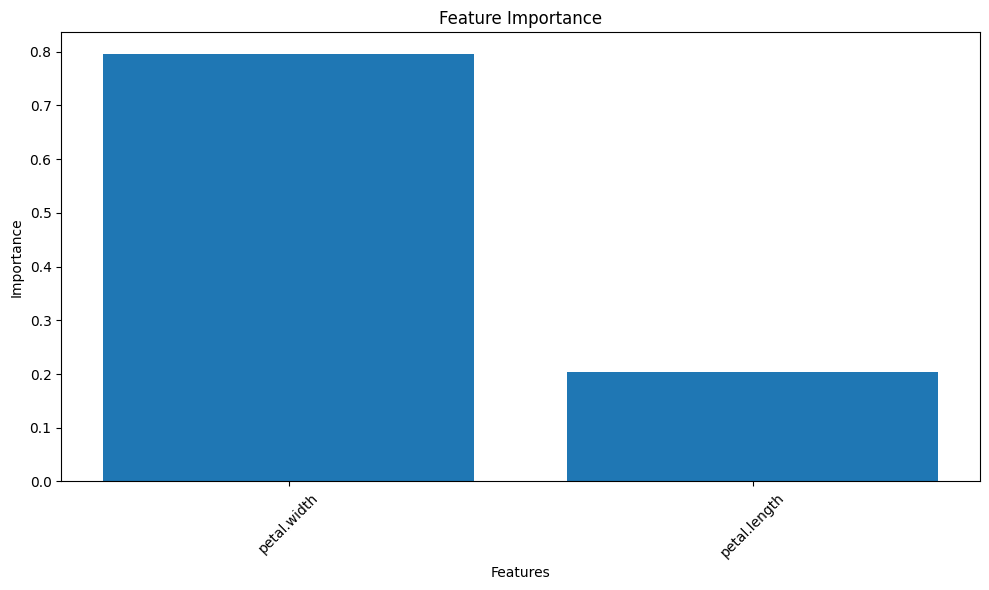

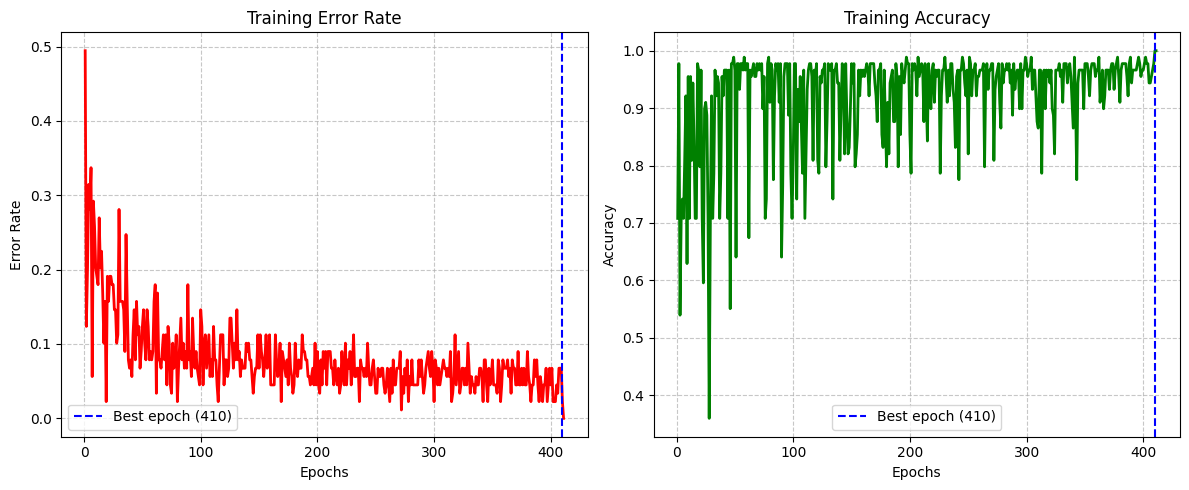

In [ ]:
# With Weight Zeros
runner = ModelRunner(X_train_2d, y_train, X_test_2d, y_test, class_names, selected_feature_names)
runner.train(weight = weight_fives, lr=0.01, weight_set=True)
runner.evaluate()
runner.plot_all(iris_x_2d, iris_y)